**Merging & Cleaning: "Total_MVP_Voting_Results.csv" & "Total_Player_Stats.csv" Datasets:**

Total_MVP_Voting_Results: 19_20 + 20_21 + 21_22 + 22_23 + 23_24

Total_Player_Stats: 19_20 + 20_21 + 21_22 + 22_23 + 23_24

In [ ]:
from google.colab import files
#Total_MVP_Voting_Results.csv

#The csv file has all five years of MVP voting results data sets merged together
uploaded = files.upload()

Saving Total_MVP_Voting_Results.csv to Total_MVP_Voting_Results (1).csv


In [ ]:
from google.colab import files
#Total_Player_Stats.csv

#The csv file has all five years of player stats data sets merged together
uploaded = files.upload()

Saving Total_Player_Stats.csv to Total_Player_Stats (1).csv


In [ ]:
import pandas as pd
df_stats = pd.read_csv('Total_Player_Stats.csv', header = 0, nrows=2184)
df_votes = pd.read_csv('Total_MVP_Voting_Results.csv', header = 0, nrows=53)

In [ ]:
df_merged = df_stats.set_index('Player').join(df_votes.set_index('Player'))
df_merged['Rank'] = df_merged['Rank'].fillna(6)#Players with no rank gets 6
df_merged = df_merged.fillna(0.0)#Players who were not voted gets 0 for votes
df_merged.loc[df_merged['Rank']>=6, 'Rank'] = 6 # 6 is the class for anyone who's below rank 5

In [ ]:
df_merged.sort_values(by = 'Rank', ascending = False)
#Missing data points from the orginal data sets will filled with zeros to prevent coding errors

,PPG,APG,RPG,SPG,BPG,G,1st Place Votes,2nd Place Votes,3rd Place Votes,Total Points,Rank
Player,,,,,,,,,,,
A.J. Lawson 22 23,3.733333,0.133333,1.400000,0.133333,0.000000,15,0.0,0.0,0.0,0.0,6.0
Mason Plumlee 19 20,7.200000,2.500000,5.200000,0.500000,0.600000,61,0.0,0.0,0.0,0.0,6.0
Marvin Bagley III 22 23,12.000000,0.857143,6.404762,0.452381,0.714286,42,0.0,0.0,0.0,0.0,6.0
Marvin Williams 19 20,5.900000,1.000000,3.200000,0.600000,0.500000,58,0.0,0.0,0.0,0.0,6.0
Marvin Williams 19 20,6.700000,1.000000,2.700000,0.600000,0.500000,41,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
Jimmy Butler 22 23,22.906250,5.312500,5.859375,1.828125,0.328125,64,1.0,24.0,27.0,104.0,2.0
Nikola Jokic 20 21,27.400000,8.600000,11.100000,1.600000,0.600000,28,91.0,8.0,1.0,971.0,1.0
Giannis Antetokounmpo 19 20,29.500000,5.600000,13.600000,1.000000,1.000000,63,85.0,16.0,0.0,962.0,1.0


In [ ]:
df_merged[df_merged.index.str.contains('Nikola', regex = True, na = False)]
#Double checking if Nikola is present in both documents because of his name
#Had to make changes in the orginal document to unitify his name spelling

,PPG,APG,RPG,SPG,BPG,G,1st Place Votes,2nd Place Votes,3rd Place Votes,Total Points,Rank
Player,,,,,,,,,,,
Nikola Jokic 19 20,19.900000,7.000000,9.700000,1.200000,0.600000,73,0.0,0.0,2.0,18.0,6.0
Nikola Jokic 20 21,27.400000,8.600000,11.100000,1.600000,0.600000,28,91.0,8.0,1.0,971.0,1.0
Nikola Jokic 21 22,27.400000,8.600000,11.100000,1.600000,0.600000,28,65.0,27.0,6.0,875.0,1.0
Nikola Jokic 22 23,24.492754,9.826087,11.840580,1.260870,0.681159,69,0.0,1.0,2.0,5.0,6.0
Nikola Vucevic 22 23,17.646341,3.231707,11.012195,0.731707,0.695122,82,0.0,0.0,0.0,0.0,6.0
Nikola Vučević 20 21,23.400000,3.400000,11.600000,1.100000,0.600000,29,0.0,0.0,0.0,0.0,6.0
Nikola Vučević 22 23,5.466667,0.666667,2.066667,0.466667,0.133333,15,0.0,0.0,0.0,0.0,6.0
Nikola Vuƒçeviƒá 19 20,19.600000,3.600000,10.900000,0.900000,0.800000,62,0.0,0.0,0.0,0.0,6.0
Nikola Vuƒçeviƒá 21 22,23.400000,3.400000,11.600000,1.100000,0.600000,29,0.0,0.0,0.0,0.0,6.0


In [ ]:
df_merged['Rank'].value_counts()
#Checking if MVP rank 1 to 5 is all present in the dataset

Rank
6.0    2164
5.0       4
1.0       4
3.0       4
4.0       4
2.0       4
Name: count, dtype: int64

**Decicion Tree Classifier**

In [ ]:
# Nth place votes are just extra information for deciding Rank feature. Hence Drop.
new_df = df_merged.drop(["1st Place Votes", "2nd Place Votes", "3rd Place Votes", "Total Points"], axis=1)

In [ ]:
new_df.head()

,PPG,APG,RPG,SPG,BPG,G,Rank
Player,,,,,,,
A.J. Lawson 22 23,3.733333,0.133333,1.400000,0.133333,0.000000,15,6.0
AJ Green 22 23,4.400000,0.628571,1.285714,0.171429,0.000000,35,6.0
AJ Griffin 22 23,8.875000,1.013889,2.125000,0.583333,0.166667,72,6.0
Aaron Gordon 19 20,14.400000,3.700000,7.700000,0.800000,0.600000,62,6.0
Aaron Gordon 20 21,13.800000,4.200000,7.200000,0.700000,0.800000,19,6.0


In [ ]:
players_with_seasons =  new_df.index.tolist()
X = []
# extract X
for index, row in new_df.iterrows():
  X.append(row[:'G'].tolist())

Y = new_df['Rank'].tolist()

In [ ]:
print(len(X), len(Y))
#Checking the numer of x and y data points

2184 2184


In [ ]:
from google.colab import files
#Player_Stats_23_24.csv

uploaded = files.upload()

Saving Player_Stats_23_24.csv to Player_Stats_23_24 (1).csv


In [ ]:
stats_newseason = pd.read_csv('Player_Stats_23_24.csv', header = 0)
#Player Stats for 23-24 season

In [ ]:
print(stats_newseason)

                     Player   PPG   APG   RPG  SPG  BPG   G
0    Precious Achiuwa 23 24   7.4   1.7   5.3  0.6  0.5  26
1    Precious Achiuwa 23 24   7.7   1.8   5.4  0.6  0.5  25
2    Precious Achiuwa 23 24   0.0   0.0   3.0  0.0  0.0   1
3         Bam Adebayo 23 24  22.0   4.0  10.4  1.1  1.0  23
4        Ochai Agbaji 23 24   6.6   1.0   2.5  0.6  0.5  34
..                      ...   ...   ...   ...  ...  ...  ..
533    Thaddeus Young 23 24   1.9   1.0   1.0  0.3  0.0   7
534        Trae Young 23 24  28.3  11.3   3.0  1.4  0.2  30
535    Omer Yurtseven 23 24   4.0   0.7   4.4  0.2  0.5  20
536       Cody Zeller 23 24   1.8   1.1   3.0  0.2  0.1  23
537       Ivica Zubac 23 24  12.2   1.2   9.7  0.2  1.3  32

[538 rows x 7 columns]


In [ ]:
X_new_season = []
# extract X
for index, row in stats_newseason.iterrows():
  X_new_season.append(row['PPG':].tolist())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(criterion="entropy", random_state=110)
dtree.fit(X, Y)
prediction = dtree.predict(X_new_season)

In [ ]:
import numpy as np
np.where(prediction < 6)
tree_result = stats_newseason.iloc[list(np.where(prediction < 6))[0]].copy()
tree_result.insert(1, "Predicted Rank", prediction[(list(np.where(prediction < 6))[0])])
tree_result

,Player,Predicted Rank,PPG,APG,RPG,SPG,BPG,G
11,Giannis Antetokounmpo 23 24,3.0,30.9,5.7,11.3,1.3,1.2,32
115,Anthony Davis 23 24,1.0,25.0,3.3,12.3,1.2,2.6,32
131,Kevin Durant 23 24,5.0,29.9,6.0,6.3,0.9,1.1,28
137,Joel Embiid 23 24,3.0,35.0,6.0,11.7,1.2,2.0,25
200,Tyler Herro 23 24,3.0,23.4,4.5,5.5,1.3,0.1,15
231,LeBron James 23 24,5.0,25.4,7.4,7.4,1.4,0.7,31
275,Damian Lillard 23 24,4.0,25.5,6.8,4.5,1.0,0.2,31
438,Anfernee Simons 23 24,4.0,27.1,5.3,3.1,0.9,0.1,11
534,Trae Young 23 24,3.0,28.3,11.3,3.0,1.4,0.2,30


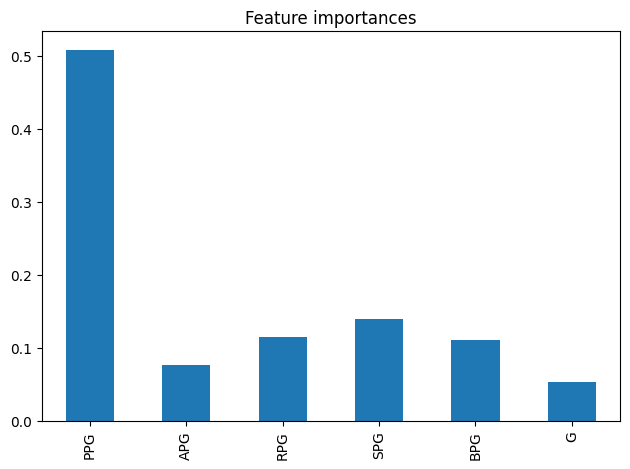

In [ ]:
import matplotlib.pyplot as plt
dtree.feature_importances_ #how important each x features are (PPG:G) for the y feature = predicted rank
tree_importances = pd.Series(dtree.feature_importances_, index=stats_newseason.columns[1:])
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

**K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Top_predicted_players = []
#changing the variables
for i in range(1,11):
  classifier = KNeighborsClassifier(n_neighbors=i).fit(X, Y)
  prediction_i = classifier.predict(X_new_season)

  indices = np.where(prediction_i < 6)[0]

  Top_predicted_players.append(f"KNN with k = {i}: ")
  players = stats_newseason.iloc[indices]['Player'].tolist()
  Top_predicted_players.extend(players)

In [ ]:
Top_predicted_players

['KNN with k = 1: ',
 'Joel Embiid 23 24',
 'James Harden 23 24',
 'Fred VanVleet 23 24',
 'KNN with k = 2: ',
 'Giannis Antetokounmpo 23 24',
 'Luka Doncic 23 24',
 'Kevin Durant 23 24',
 'Joel Embiid 23 24',
 'Shai Gilgeous-Alexander 23 24',
 'James Harden 23 24',
 'Fred VanVleet 23 24',
 'KNN with k = 3: ',
 'Giannis Antetokounmpo 23 24',
 'Joel Embiid 23 24',
 'KNN with k = 4: ',
 'Giannis Antetokounmpo 23 24',
 'Joel Embiid 23 24',
 'KNN with k = 5: ',
 'Giannis Antetokounmpo 23 24',
 'Joel Embiid 23 24',
 'KNN with k = 6: ',
 'Giannis Antetokounmpo 23 24',
 'Joel Embiid 23 24',
 'KNN with k = 7: ',
 'Giannis Antetokounmpo 23 24',
 'KNN with k = 8: ',
 'KNN with k = 9: ',
 'KNN with k = 10: ']

**T-Test**

In [ ]:
#MVPS = players ranked of 5 or less
MVPS = new_df[new_df['Rank'] <= 5]
#NO_MVPS = players ranked of 6 or higher
NO_MVPS = new_df[new_df['Rank'] >= 6]

In [ ]:
#Counting the number of ranks
#Five MVPS (Top 1-5) each season = Rank 1, Rank 2, Rank 3, Rank 4, Rank 5
#Remaining players not selected as top 5 voted players for MVP = Rank 6
new_df['Rank'].value_counts()

Rank
6.0    2164
5.0       4
1.0       4
3.0       4
4.0       4
2.0       4
Name: count, dtype: int64

In [ ]:
'''
Comparing PPG(points per game) values between
MVP(players ranked of 5 or less) and NO_MVPS(players ranked of 6 or higher)
'''
#Null hypothesis = "Mean of PPG(Points per game)" for players Ranked 1,2,3,4,5 is equal to the mean PPG for remaining players Ranked 6
  #"No significant difference" in the number of PPG(Points per game) between two groups of players based on rank

#Alternative = "Mean of PPG(Points per game)" for players Ranked 1,2,3,4,5 is NOT equal to the mean PPG for remaining players Ranked 6
  #There is "significant difference" in the in the number of PPG(Points per game) between two groups of players based on rank

#Confidence level = 5%

import scipy.stats


_, p = scipy.stats.ttest_ind(MVPS["PPG"],NO_MVPS["PPG"])
p

#Reject null hypothesis

1.4178115826458915e-36

**ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Null hypothesis: μ(PPG), μ(APG), μ(RPG), μ(SPG), μ(BPG), and μ(G) are the same across top Rank groups(1-5)
#Alternative: At least one pair is not equal
#Confidence level = 5%

model = ols(
    'Rank ~ PPG + APG + RPG + SPG + BPG + G', data=MVPS).fit()
sm.stats.anova_lm(model, typ=2)
#https://www.statology.org/two-way-anova-python/

#Result = Only RPG has a significant different

,sum_sq,df,F,PR(>F)
PPG,0.049399,1.0,0.024441,0.878170
APG,2.260256,1.0,1.118287,0.309543
RPG,10.415297,1.0,5.153085,0.040865
SPG,1.896456,1.0,0.938293,0.350394
BPG,6.048612,1.0,2.992618,0.107298
G,1.664102,1.0,0.823333,0.380720
Residual,26.275303,13.0,NaN,NaN


In [ ]:
#Null hypothesis: μ(PPG), μ(APG), μ(RPG), μ(SPG), μ(BPG), and μ(G) are the same across different ALL Rank groups
#Alternative: At least one pair is not equal
#Confidence level = 5%

model = ols(
    'Rank ~ PPG + APG + RPG + SPG + BPG + G', data=new_df).fit()
sm.stats.anova_lm(model, typ=2)
#https://www.statology.org/two-way-anova-python/

#Result = Every element has a significant different

,sum_sq,df,F,PR(>F)
PPG,2.439817,1.0,25.997102,3.714650e-07
APG,0.232809,1.0,2.480665,1.153988e-01
RPG,0.701511,1.0,7.474839,6.307372e-03
SPG,0.051077,1.0,0.544248,4.607569e-01
BPG,0.369988,1.0,3.942346,4.721035e-02
G,0.305652,1.0,3.256825,7.126484e-02
Residual,204.310551,2177.0,NaN,NaN


**The Correalation Seaborn Heatmap**

In [ ]:
from google.colab import files
#2019_2020_Player_Stats.csv
uploaded = files.upload()

Saving 2019_2020_Player_Stats.csv to 2019_2020_Player_Stats (1).csv


<Axes: >

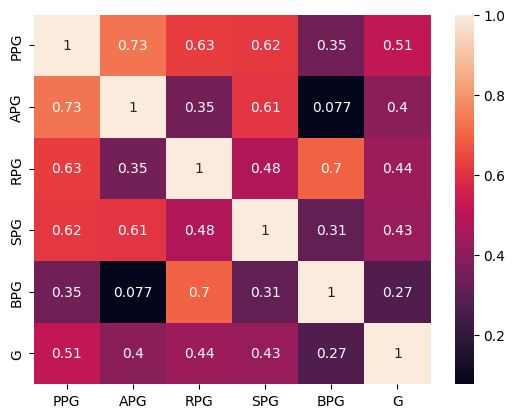

In [ ]:
#Seaborn heatmap of 2019-2020 season
import pandas as pd

df = pd.read_csv('2019_2020_Player_Stats.csv', header = 0)
df.head()
import seaborn as sns

sns.heatmap(df.drop(columns = ['Player'], axis = 1).corr(), annot = True)

In [ ]:
from google.colab import files
#2020_2021_Player_Stats.csv
uploaded = files.upload()

Saving 2020_2021_Player_Stats.csv to 2020_2021_Player_Stats.csv


<Axes: >

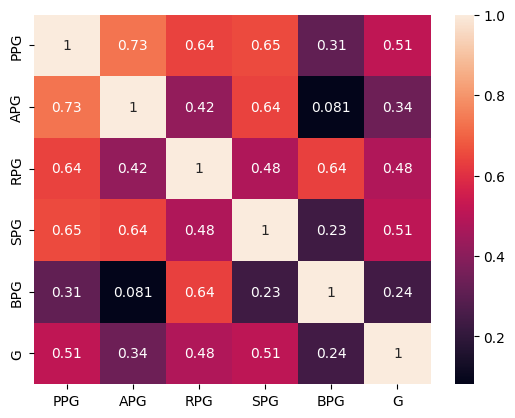

In [ ]:
#Seaborn heatmap of 2020-2021 season
import pandas as pd

df = pd.read_csv('2020_2021_Player_Stats.csv', header = 0)
df.head()
import seaborn as sns

sns.heatmap(df.drop(columns = ['Player'], axis = 1).corr(), annot = True)

In [ ]:
from google.colab import files
#2021_2022_Player_Stats.csv
uploaded = files.upload()

Saving 2021_2022_Player_Stats.csv to 2021_2022_Player_Stats (2).csv


<Axes: >

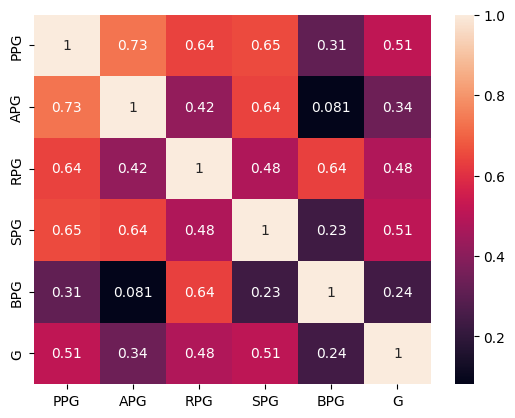

In [ ]:
#Seaborn heatmap of 2021-2022 season
import pandas as pd

df = pd.read_csv('2021_2022_Player_Stats.csv', header = 0)
df.head()
import seaborn as sns

sns.heatmap(df.drop(columns = ['Player'], axis = 1).corr(), annot = True)

In [ ]:
from google.colab import files
#2022_2023_Player_Stats.csv
uploaded = files.upload()

Saving 2022_2023_Player_Stats.csv to 2022_2023_Player_Stats (1).csv


<Axes: >

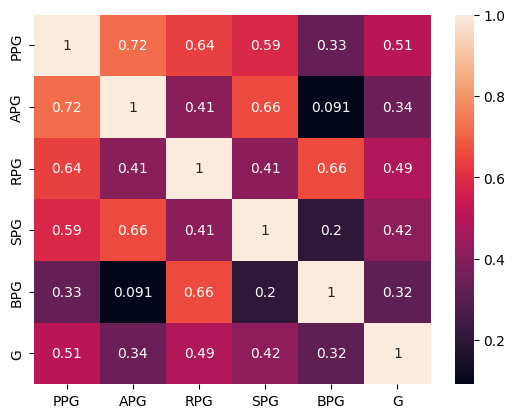

In [ ]:
#Seaborn heatmap of 2022-2023 season
import pandas as pd

df = pd.read_csv('2022_2023_Player_Stats.csv', header = 0)
df.head()
import seaborn as sns

sns.heatmap(df.drop(columns = ['Player'], axis = 1).corr(), annot = True)

In [ ]:
from google.colab import files
#2023_2024_Player_Stats.csv
uploaded = files.upload()

Saving 2023_2024_Player_Stats.csv to 2023_2024_Player_Stats (1).csv


<Axes: >

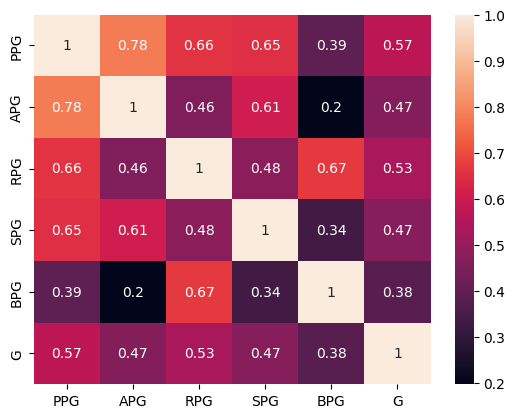

In [ ]:
#Seaborn heatmap of 2023-2024 season
import pandas as pd

df = pd.read_csv('2023_2024_Player_Stats.csv', header = 0)
df.head()
import seaborn as sns

sns.heatmap(df.drop(columns = ['Player'], axis = 1).corr(), annot = True)

**Visualization For Top 15 Players of each Stat**


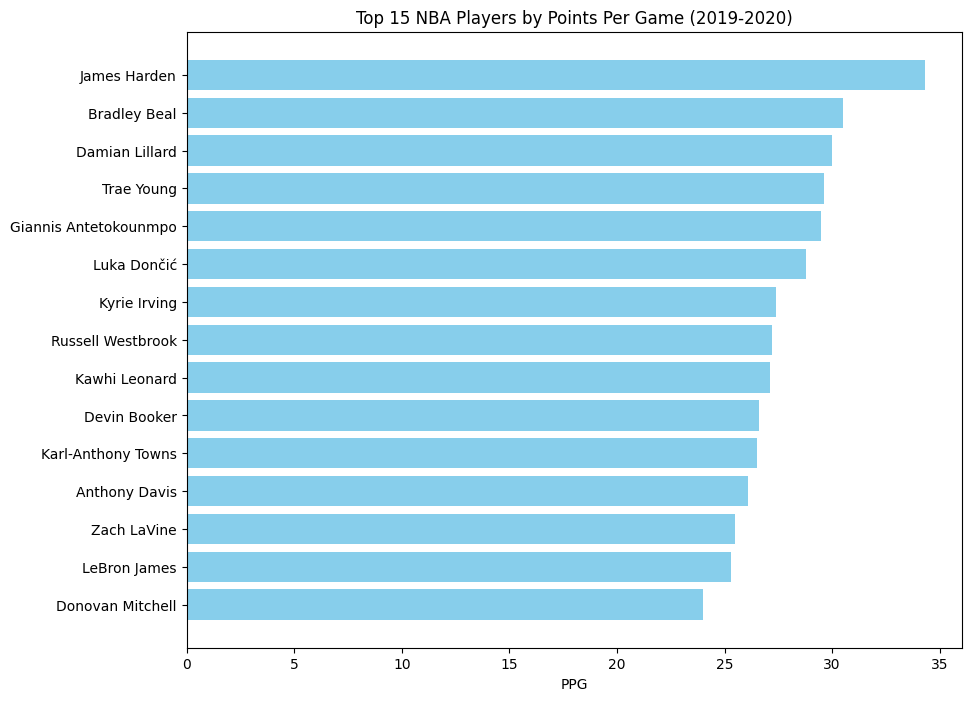

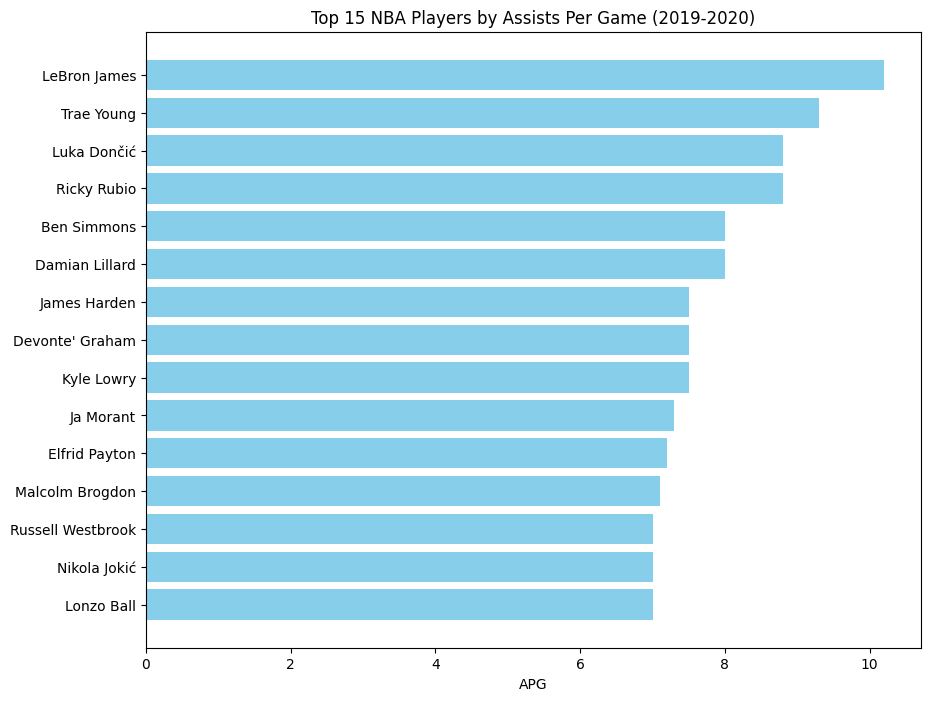

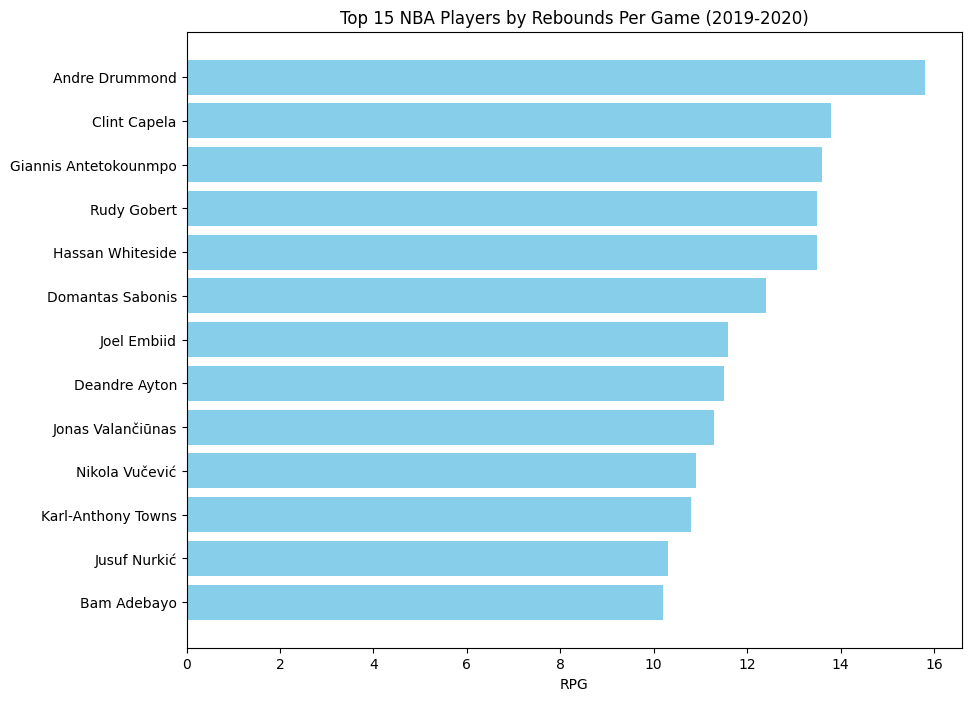

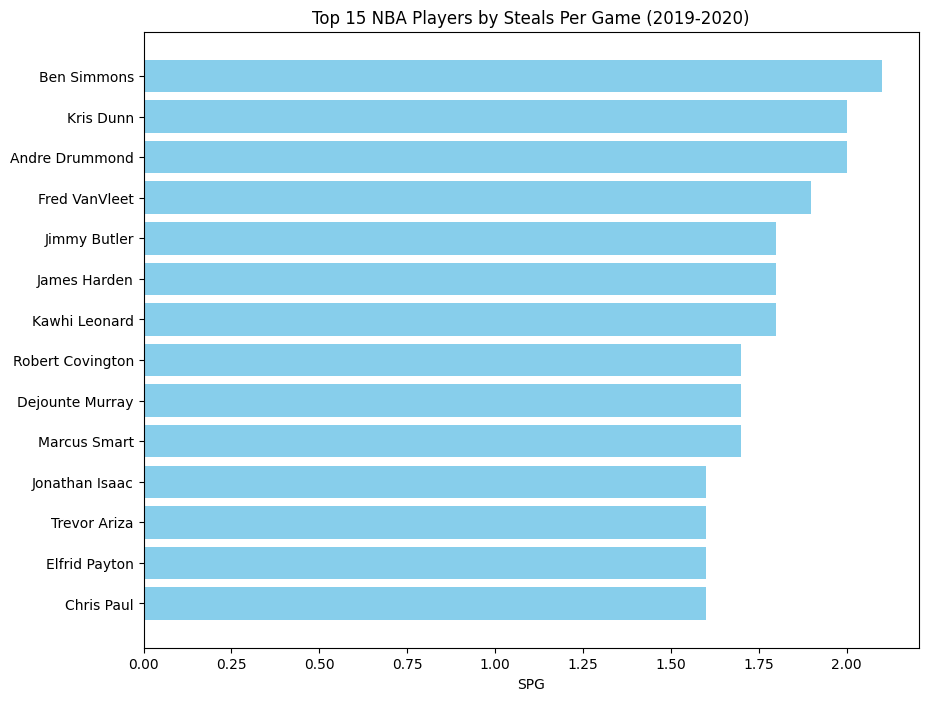

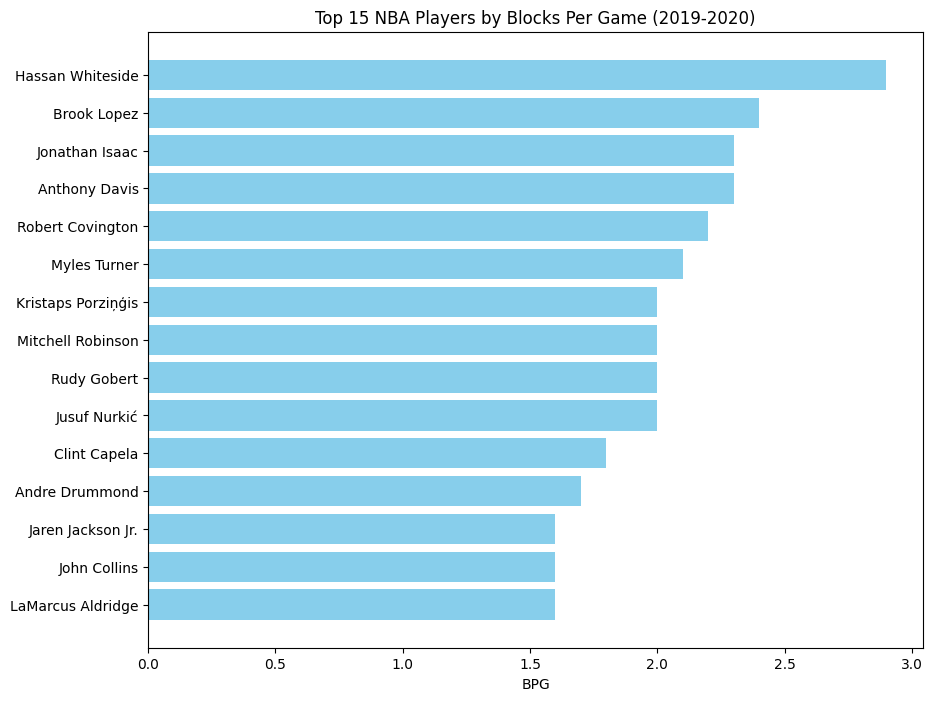

In [ ]:
import pandas as pd

file_path = '/2019_to_2020_Player_Stats.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.columns

import matplotlib.pyplot as plt

# Function to plot top 15 players for a given statistic
def plot_top_players(stat, title):
    top_players = data.sort_values(by=stat, ascending=False).head(15)
    plt.figure(figsize=(10, 8))
    plt.barh(top_players['Player'], top_players[stat], color='skyblue')
    plt.xlabel(stat)
    plt.title(f'Top 15 NBA Players by {title} (2019-2020)')
    plt.gca().invert_yaxis()  # Invert y axis to have the highest values at the top
    plt.show()

# Plot for Points Per Game (PPG)
plot_top_players('PPG', 'Points Per Game')
plot_top_players('APG', 'Assists Per Game')
plot_top_players('RPG', 'Rebounds Per Game')
plot_top_players('SPG', 'Steals Per Game')
plot_top_players('BPG', 'Blocks Per Game')



20/21

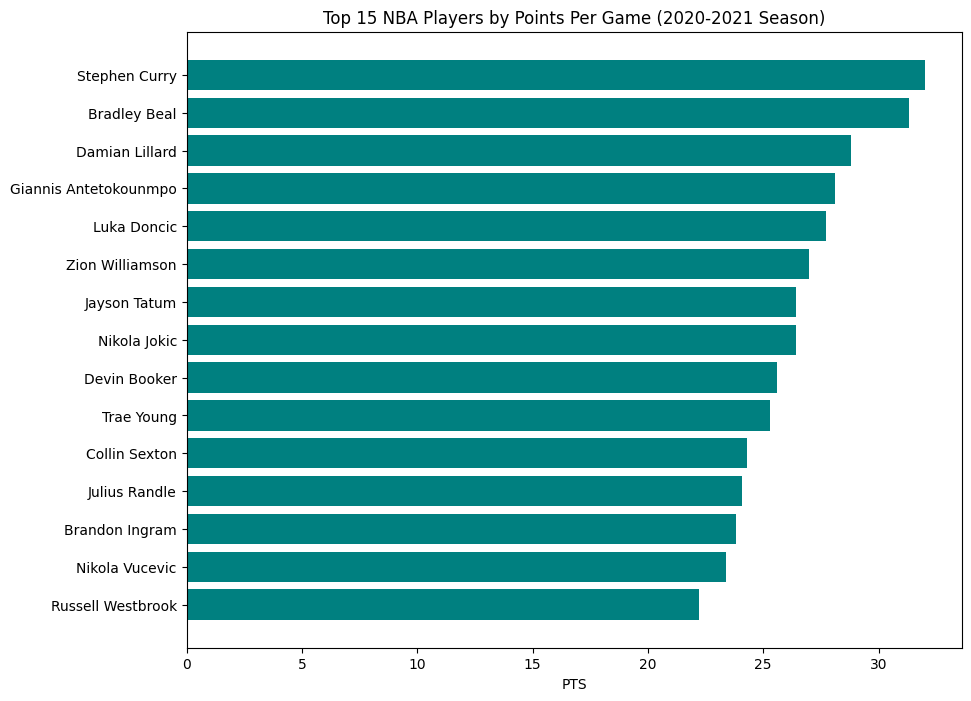

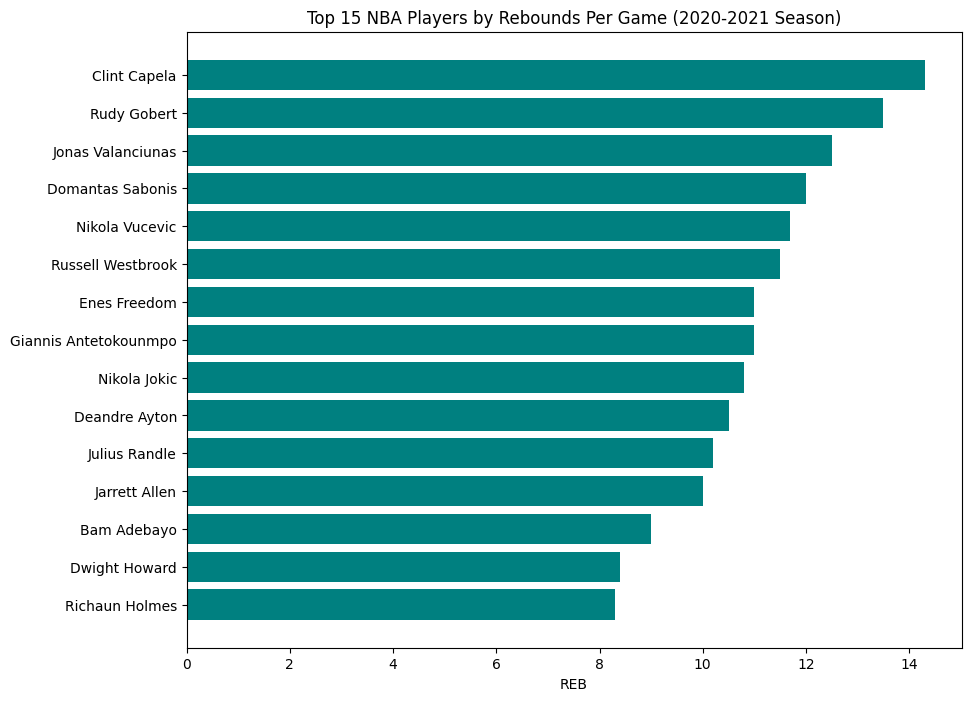

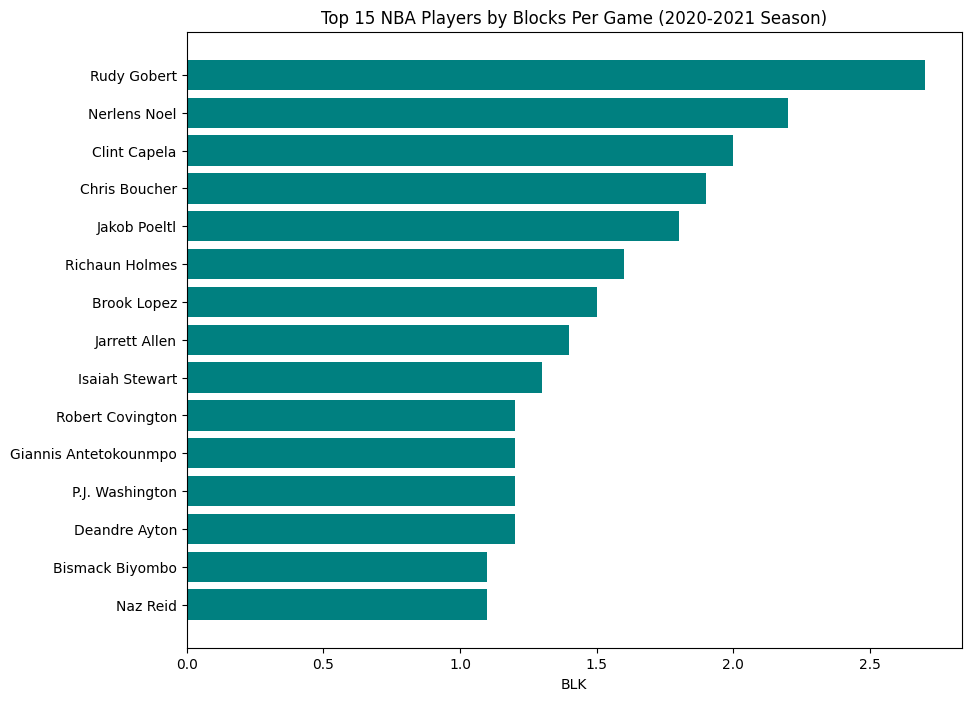

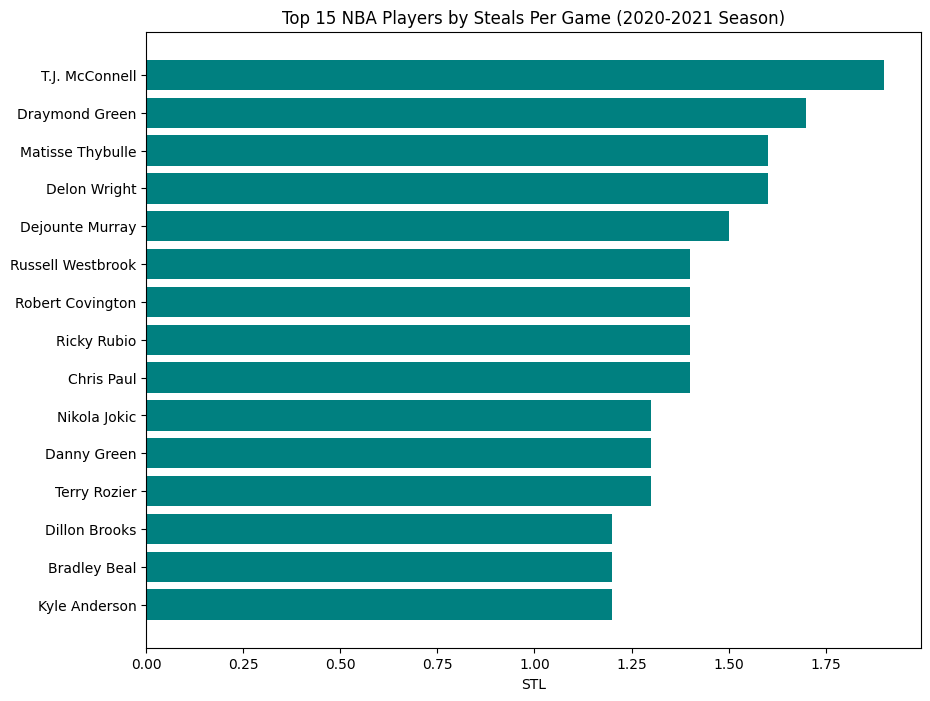

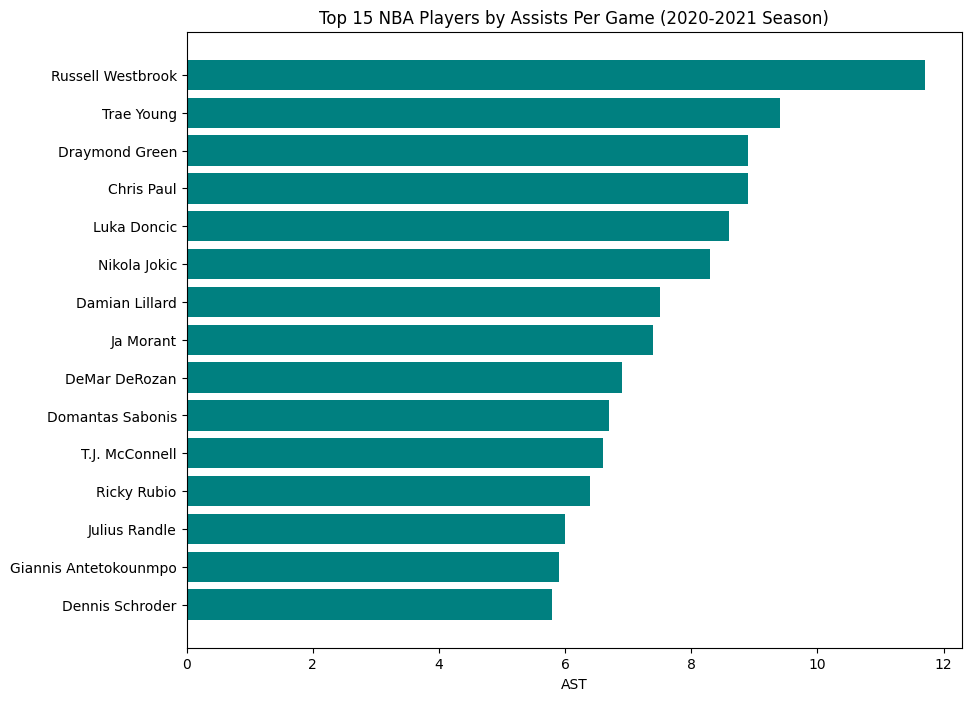

In [ ]:
file_path_latest = '/202021-reg-tra-player.csv'
data_latest = pd.read_csv(file_path_latest)

data_latest.head(), data_latest.columns

filtered_data_latest = data_latest[data_latest['GP'] >= 60]

# Function to plot top 15 players for a given statistic for the latest dataset
def plot_top_players_latest(statistic, title):
    sorted_data_latest = filtered_data_latest.sort_values(by=statistic, ascending=False).head(15)
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_data_latest['PLAYER'], sorted_data_latest[statistic], color='teal')
    plt.xlabel(statistic)
    plt.title(f'Top 15 NBA Players by {title} (2020-2021 Season)')
    plt.gca().invert_yaxis()
    plt.show()

# Plotting for each statistic for the latest dataset
statistics_latest = {
    'PTS': 'Points Per Game',
    'REB': 'Rebounds Per Game',
    'BLK': 'Blocks Per Game',
    'STL': 'Steals Per Game',
    'AST': 'Assists Per Game'
}

for stat, title in statistics_latest.items():
    plot_top_players_latest(stat, title)

21/22

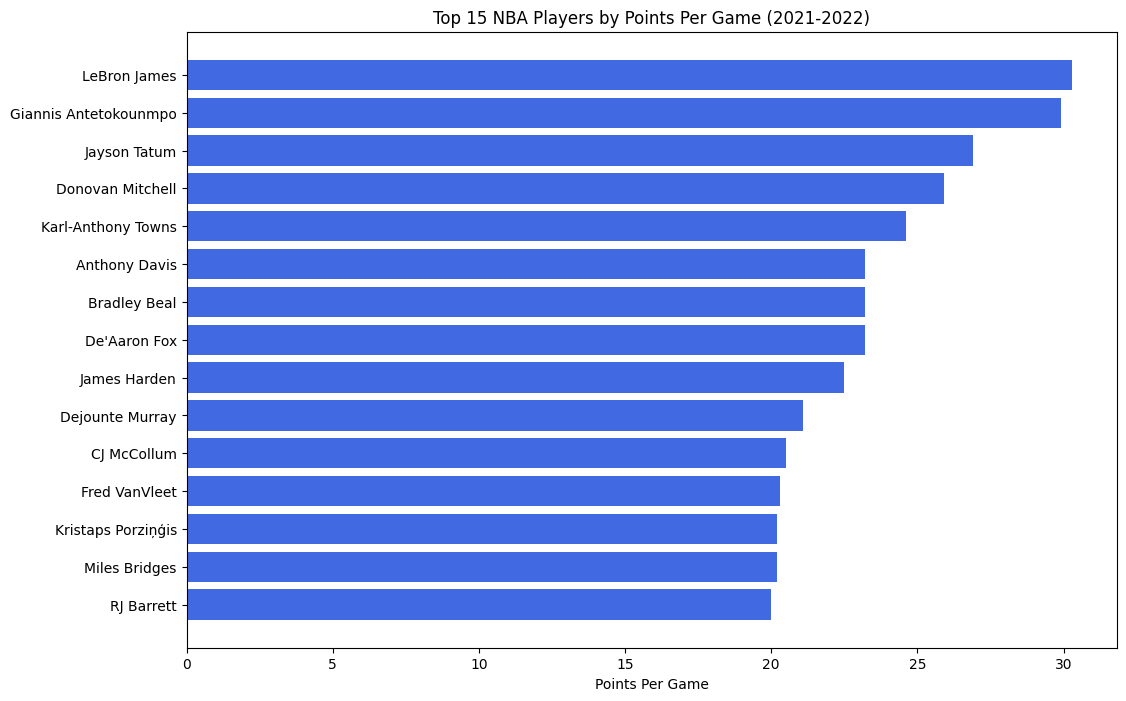

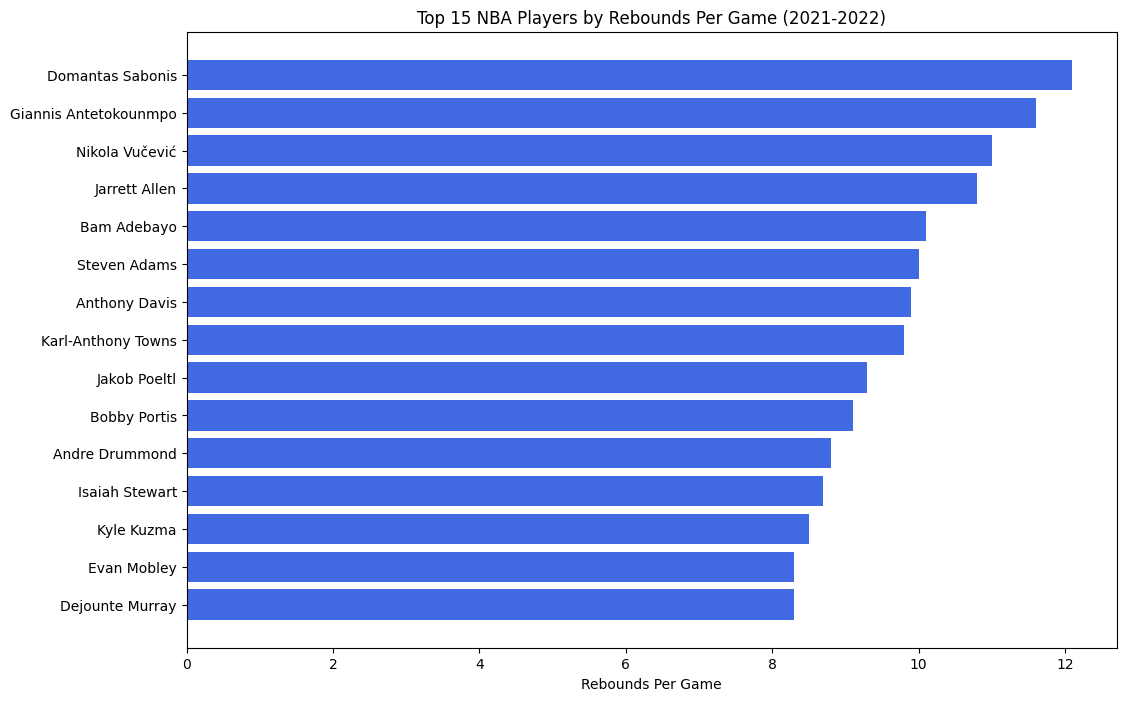

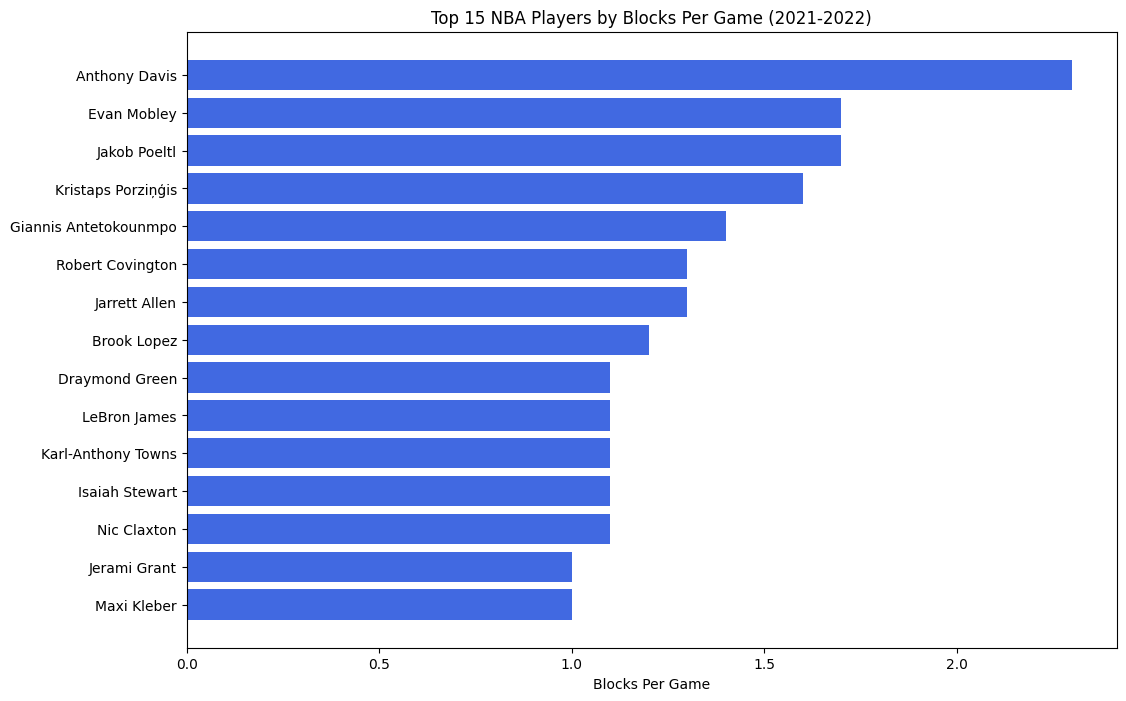

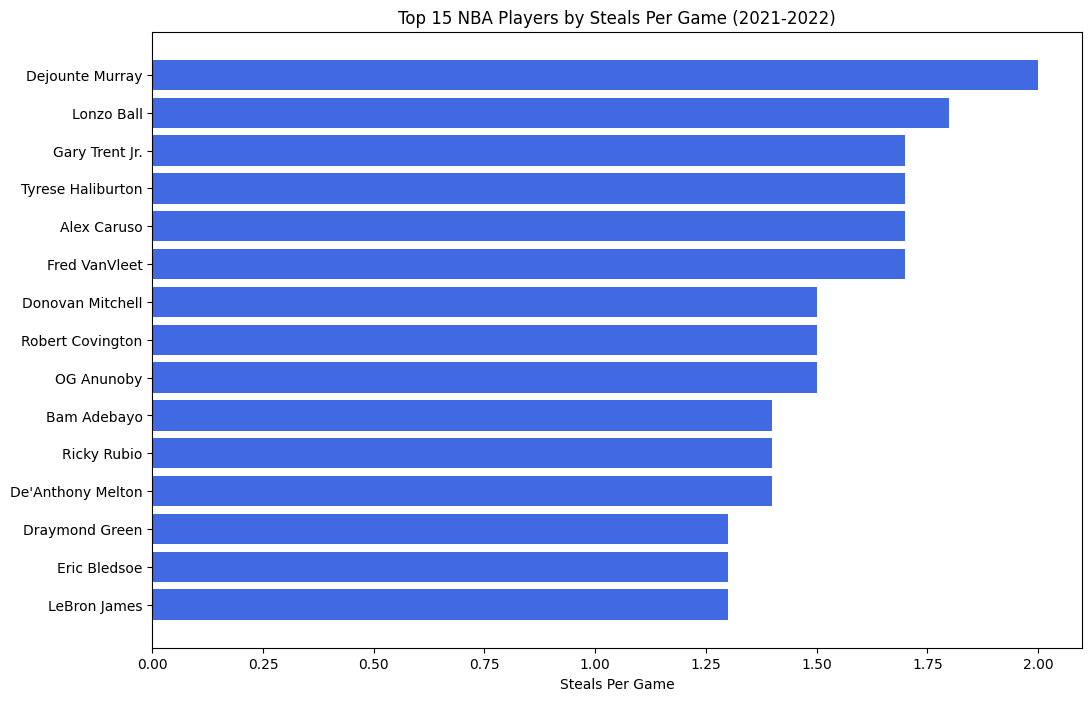

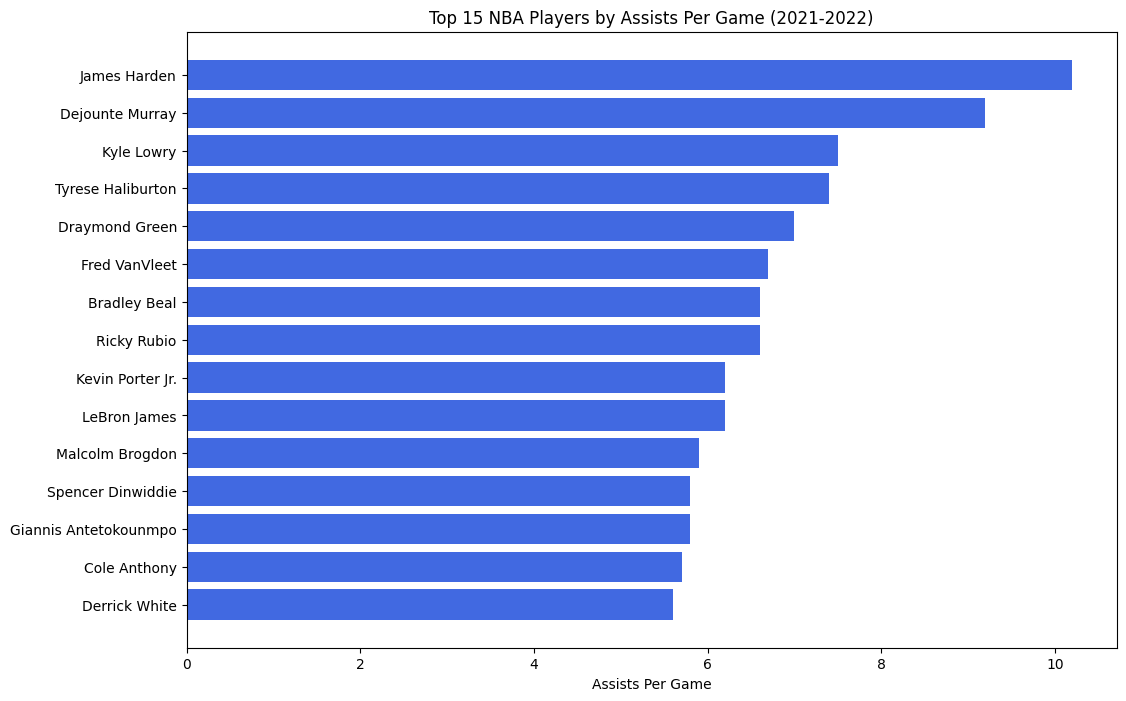

In [ ]:
file_path_2122 = '/nba_player_per_game_2122.csv'
data_2122 = pd.read_csv(file_path_2122)

data_2122.head(), data_2122.columns
data_2122_filtered = data_2122[data_2122['games_played'] > 60]

# Define the statistics for visualization
statistics_to_visualize_2122 = {
    'pts': 'Points Per Game',
    'trb': 'Rebounds Per Game',
    'blk': 'Blocks Per Game',
    'stl': 'Steals Per Game',
    'ast': 'Assists Per Game'
}

# Function to plot top 15 players for each statistic
def plot_top_15_2122(stat, title):
    sorted_data = data_2122_filtered.sort_values(by=stat, ascending=False).head(15)
    plt.figure(figsize=(12, 8))
    plt.barh(sorted_data['players'], sorted_data[stat], color='royalblue')
    plt.xlabel(f'{title}')
    plt.title(f'Top 15 NBA Players by {title} (2021-2022)')
    plt.gca().invert_yaxis()
    plt.show()

# Generate plots for each statistic
for stat, title in statistics_to_visualize_2122.items():
    plot_top_15_2122(stat, title)



22/23

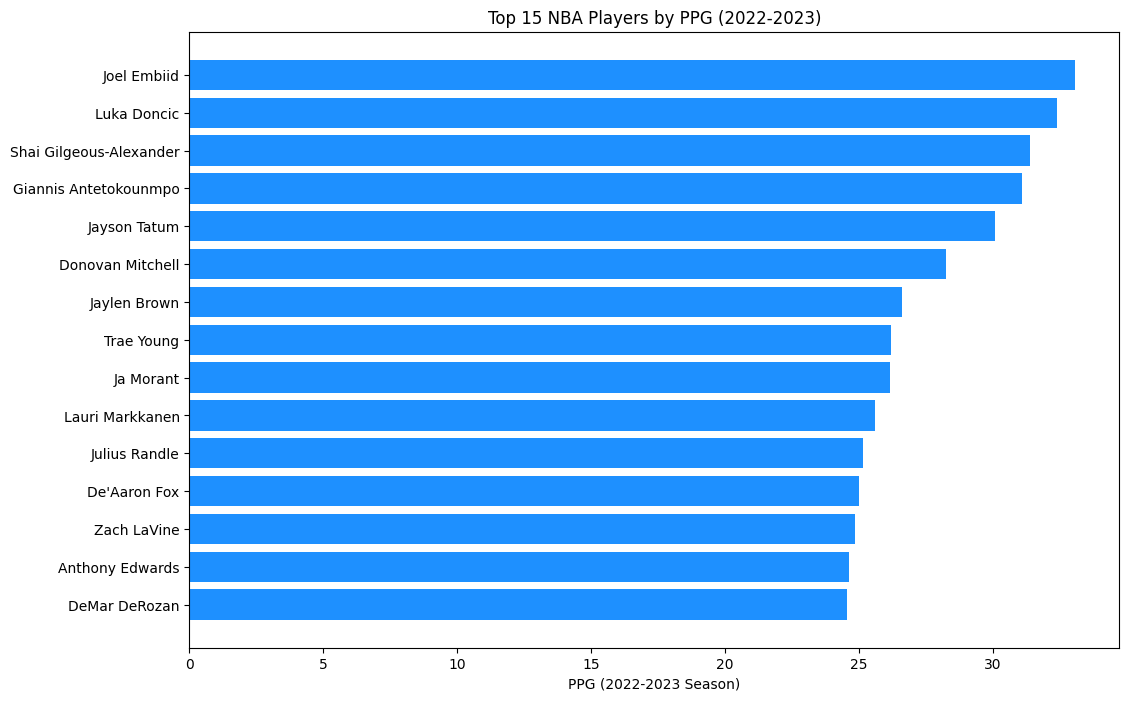

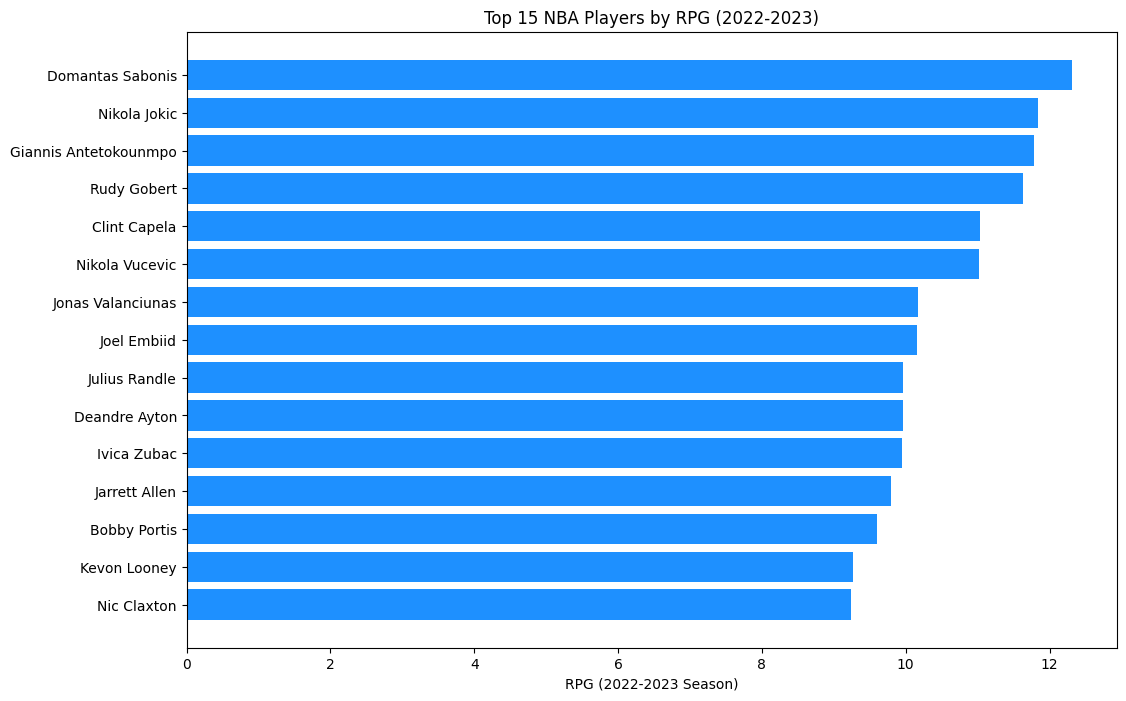

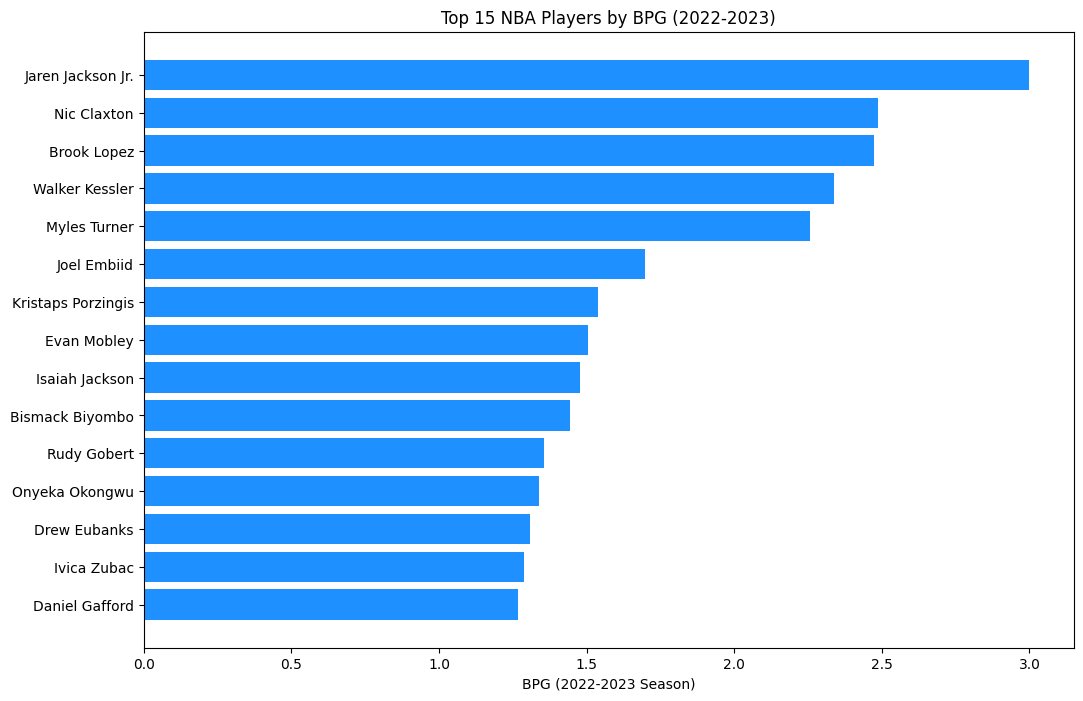

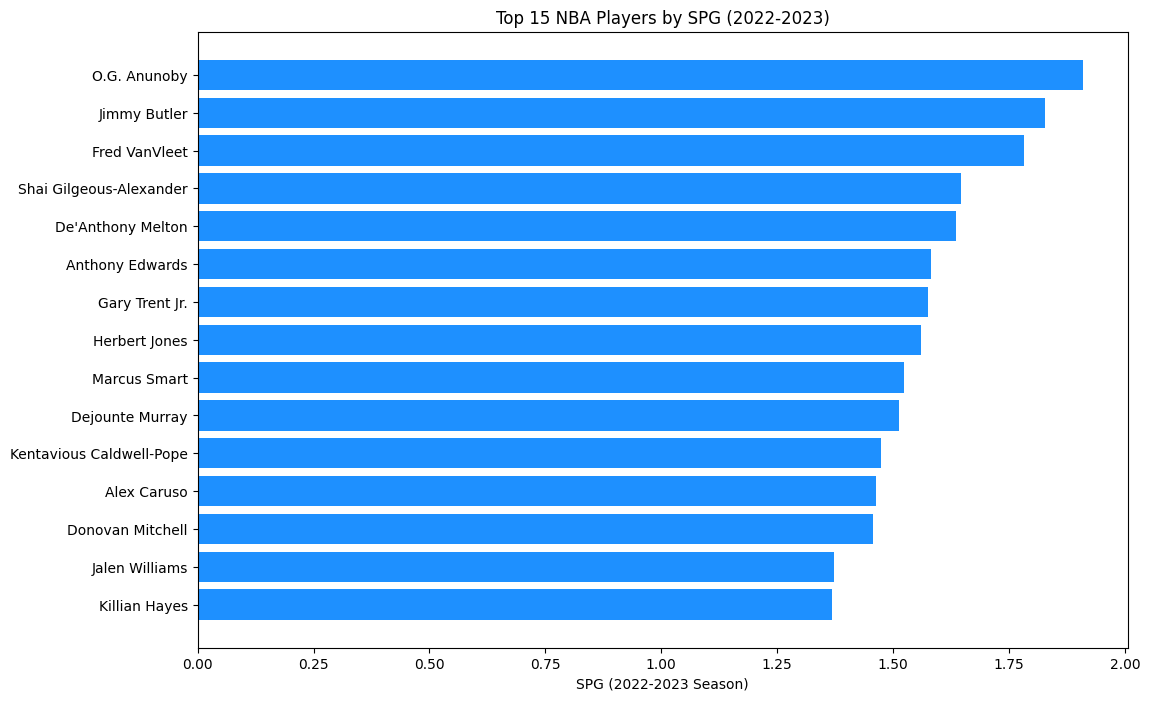

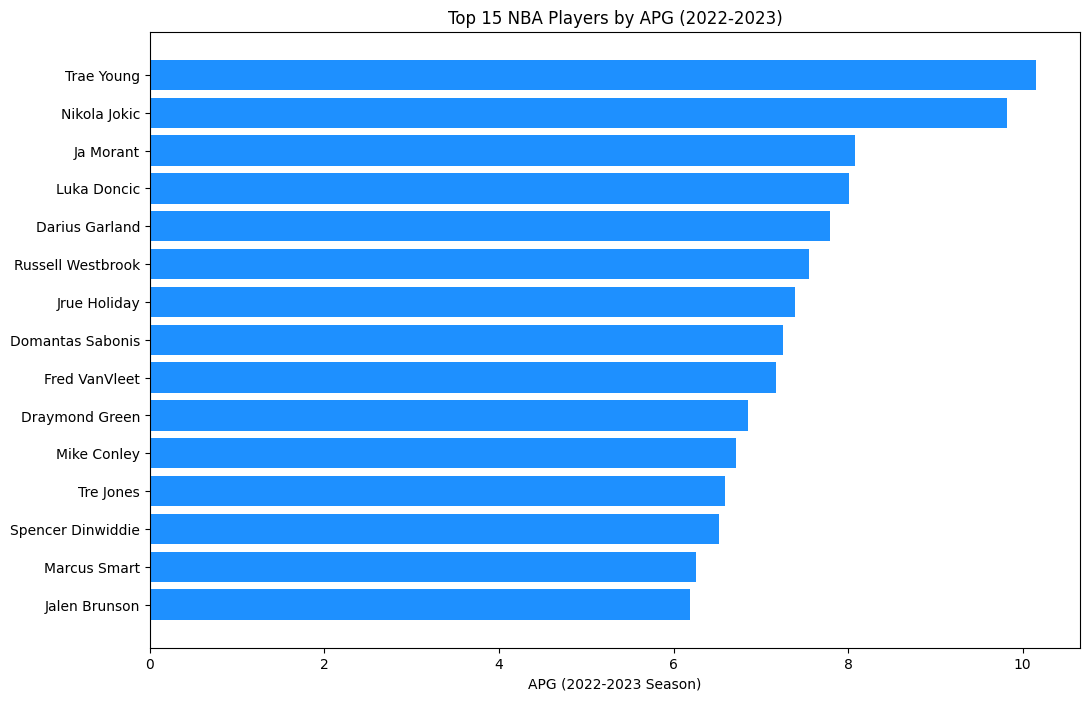

In [ ]:
file_path_2022_2023 = '/2022_to_2023_Player_Stats.csv'
data_2022_2023 = pd.read_csv(file_path_2022_2023)

# Display the first few rows of the dataframe to understand its structure and columns
data_2022_2023.head(), data_2022_2023.columns

# Correct the column names using the first row and drop the first row
data_2022_2023.columns = data_2022_2023.iloc[0]
data_2022_2023 = data_2022_2023.drop(index=0)

# Convert necessary columns to numeric types
numeric_columns_new = ['GP', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'PPG', 'APG', 'RPG', 'SPG', 'BPG']
data_2022_2023[numeric_columns_new] = data_2022_2023[numeric_columns_new].apply(pd.to_numeric)

# Filter for players who have played more than 60 games
data_2022_2023_filtered_new = data_2022_2023[data_2022_2023['GP'] > 60]

# Visualizing the top 15 players for each statistic
statistics_to_visualize_new = ['PPG', 'RPG', 'BPG', 'SPG', 'APG']

def plot_top_15_new(stat):
    sorted_data_new = data_2022_2023_filtered_new.sort_values(by=stat, ascending=False).head(15)
    plt.figure(figsize=(12, 8))
    plt.barh(sorted_data_new['PName'], sorted_data_new[stat], color='dodgerblue')
    plt.xlabel(f'{stat} (2022-2023 Season)')
    plt.title(f'Top 15 NBA Players by {stat} (2022-2023)')
    plt.gca().invert_yaxis()
    plt.show()

for stat in statistics_to_visualize_new:
    plot_top_15_new(stat)

23/24

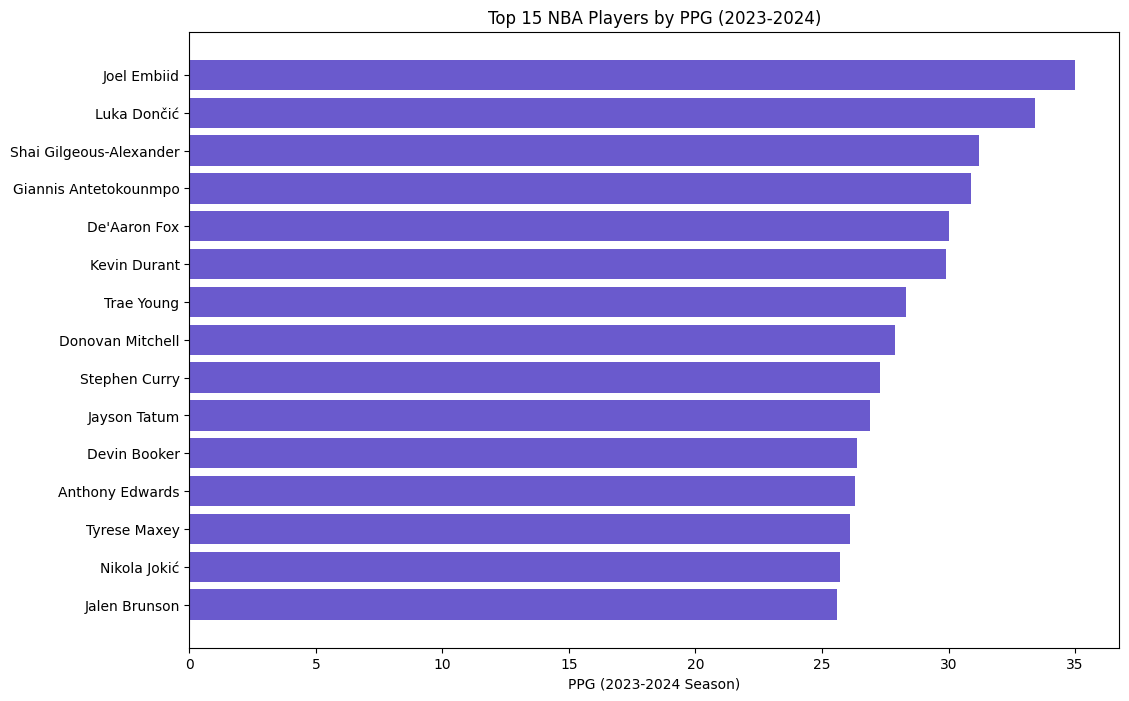

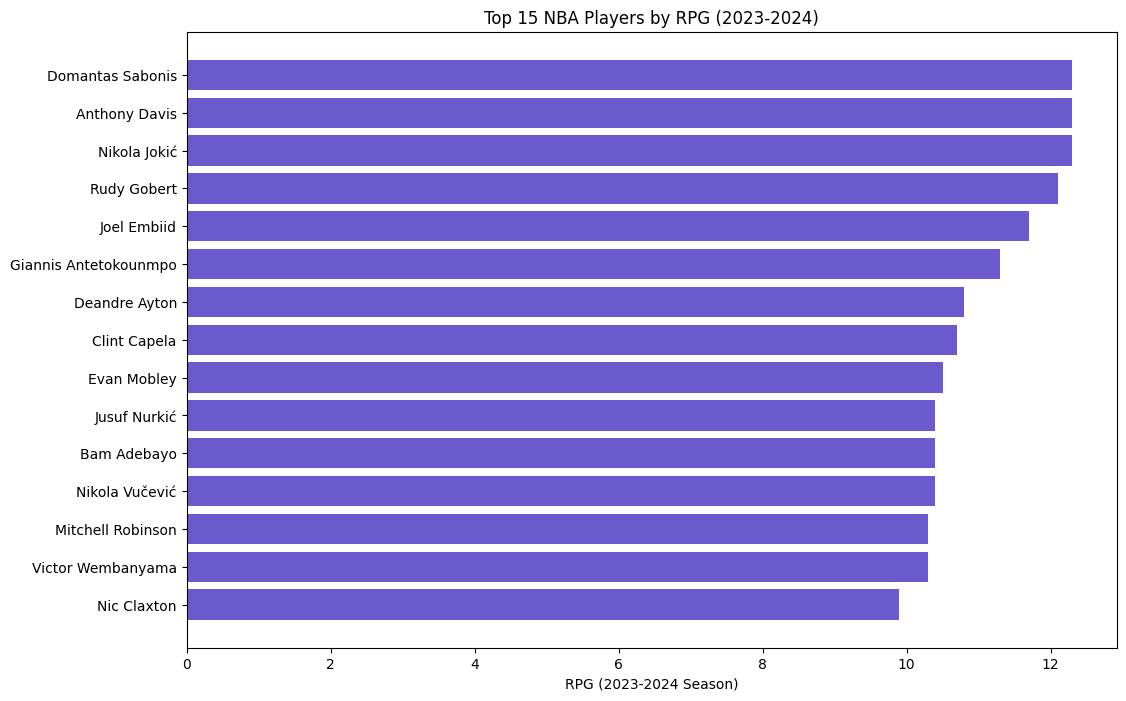

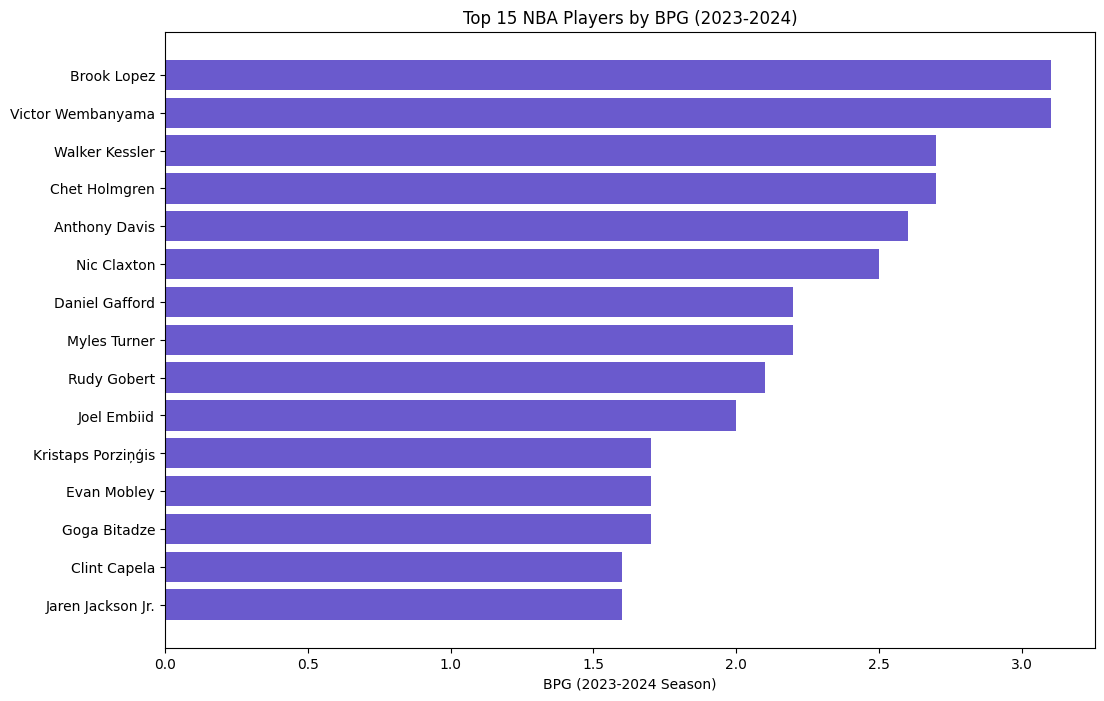

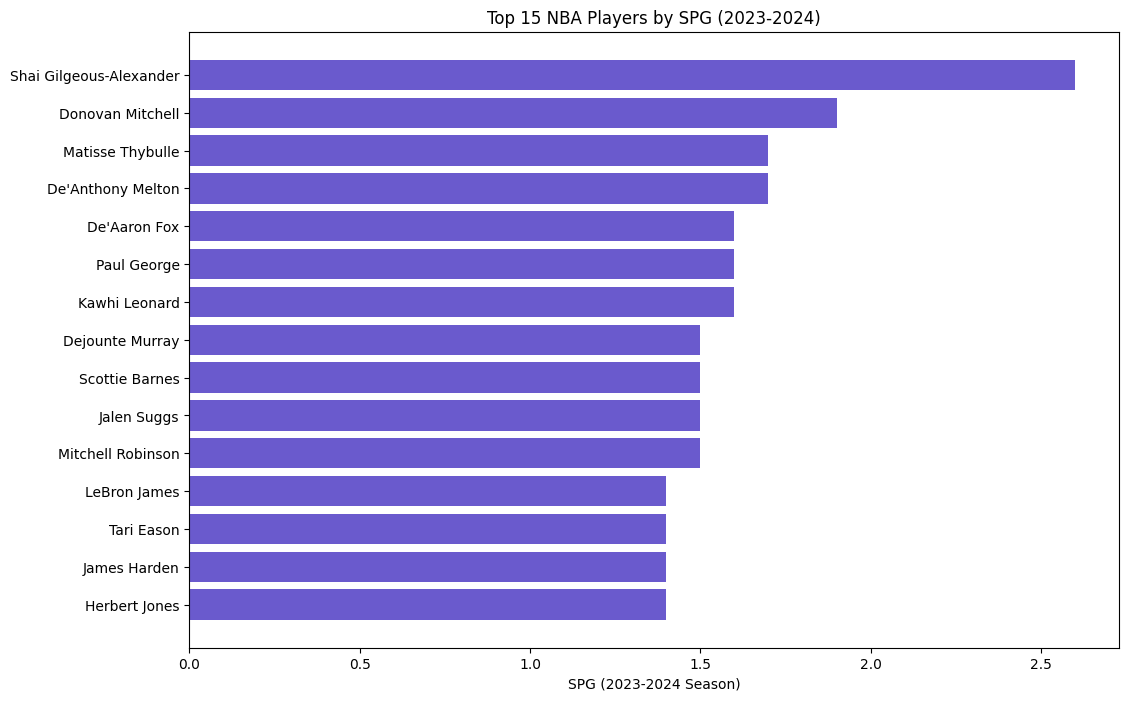

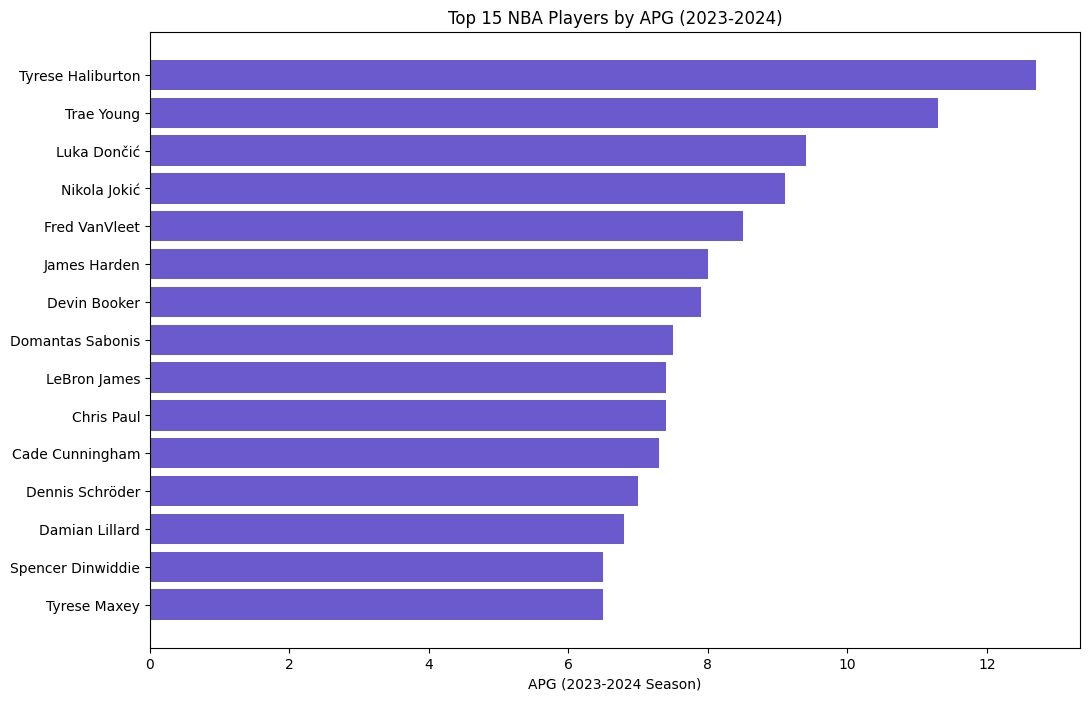

In [ ]:

file_path_2023_2024 = '/2023_to_2024_Player_Stats.csv'
data_2023_2024 = pd.read_csv(file_path_2023_2024)

# Display the first few rows of the dataframe to understand its structure and columns
data_2023_2024.head(), data_2023_2024.columns

# Correct the column names using the first row and drop the first row
data_2023_2024.columns = data_2023_2024.iloc[0]
data_2023_2024 = data_2023_2024.drop(index=0)

# Convert necessary columns to numeric types
numeric_columns_2023_2024 = ['G', 'RPG', 'APG', 'SPG', 'BPG', 'PPG']
data_2023_2024[numeric_columns_2023_2024] = data_2023_2024[numeric_columns_2023_2024].apply(pd.to_numeric, errors='coerce')

# Filter for players who have played more than 20 games
data_2023_2024_filtered = data_2023_2024[data_2023_2024['G'] > 20]

# Visualizing the top 15 players for each statistic
statistics_to_visualize_2023_2024 = ['PPG', 'RPG', 'BPG', 'SPG', 'APG']

def plot_top_15_2023_2024(stat):
    sorted_data_2023_2024 = data_2023_2024_filtered.sort_values(by=stat, ascending=False).head(15)
    plt.figure(figsize=(12, 8))
    plt.barh(sorted_data_2023_2024['Player'], sorted_data_2023_2024[stat], color='slateblue')
    plt.xlabel(f'{stat} (2023-2024 Season)')
    plt.title(f'Top 15 NBA Players by {stat} (2023-2024)')
    plt.gca().invert_yaxis()
    plt.show()

for stat in statistics_to_visualize_2023_2024:
    plot_top_15_2023_2024(stat)


**Visualization comparison of MVPs of each season with the next Top 4 Players in MVP Voting for the 19/20 - 22/23**

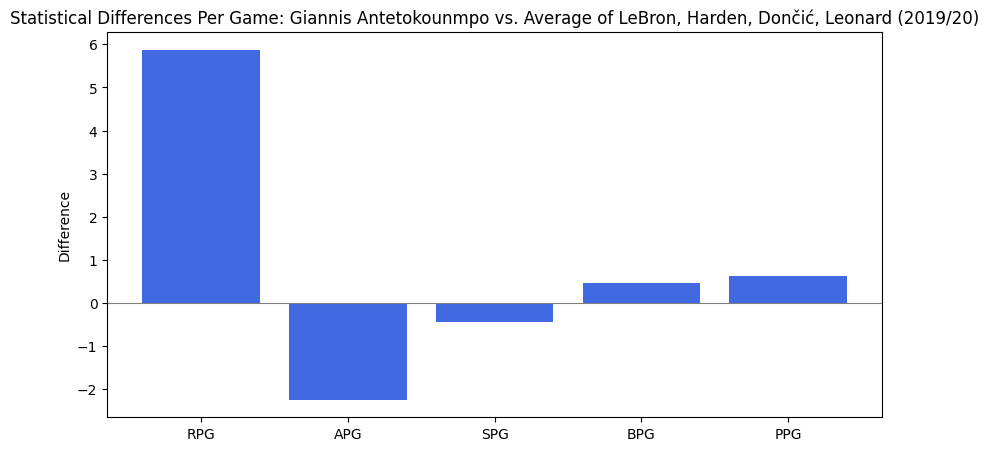

In [ ]:
# Load the dataset
comparison_path = '/2019_to_2020_Player_Stats.csv'
comparisondata1 = pd.read_csv(comparison_path)

players_to_compare = ["LeBron James", "James Harden", "Luka Dončić", "Kawhi Leonard"]

# Extracting stats for Giannis Antetokounmpo and the other players
giannis_stats = comparisondata1[comparisondata1["Player"].str.contains("Giannis Antetokounmpo")].iloc[0]
comparison_players_stats = comparisondata1[comparisondata1["Player"].isin(players_to_compare)]

# Calculating the average stats for the comparison players
average_stats = comparison_players_stats[['RPG', 'APG', 'SPG', 'BPG', 'PPG']].mean()

# Difference between Giannis' stats and the average of the other players
stat_difference = giannis_stats[['RPG', 'APG', 'SPG', 'BPG', 'PPG']] - average_stats
stat_difference

# Create a bar graph to visualize the differences
stat_categories = ['RPG', 'APG', 'SPG', 'BPG', 'PPG']
differences = stat_difference.values

plt.figure(figsize=(10, 5))
plt.bar(stat_categories, differences, color=['royalblue'])
plt.title('Statistical Differences Per Game: Giannis Antetokounmpo vs. Average of LeBron, Harden, Dončić, Leonard (2019/20)')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linewidth=0.8)  # Adding a line at zero for reference
plt.show()

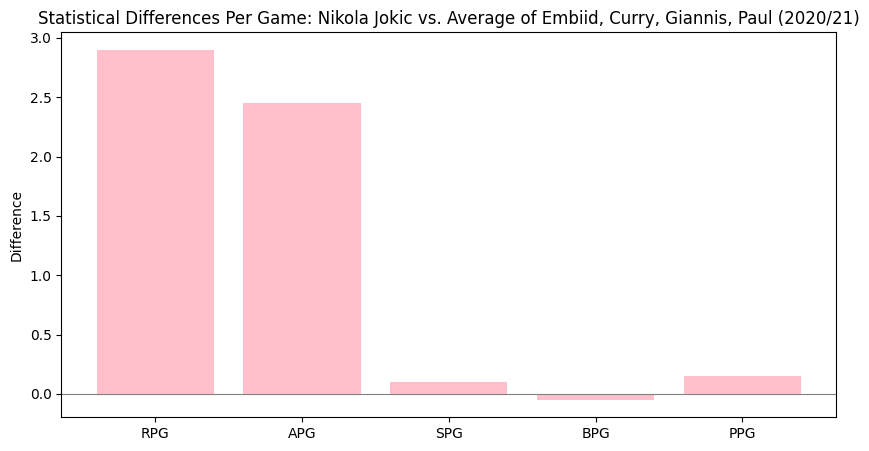

In [ ]:
file_path_2021 = '/202021-reg-tra-player.csv'
data_2021 = pd.read_csv(file_path_2021)

players_to_compare_2021 = ["Joel Embiid", "Stephen Curry", "Giannis Antetokounmpo", "Chris Paul"]

# Extracting stats for Nikola Jokic, handling potential spelling issues
jokic_stats = data_2021[data_2021["PLAYER"].str.contains("Nikola Jokic", case=False)].iloc[0]

# Extracting stats for comparison players
comparison_players_stats_2021 = data_2021[data_2021["PLAYER"].isin(players_to_compare_2021)]

# Calculating the average stats for the comparison players
average_stats_2021 = comparison_players_stats_2021[['REB', 'AST', 'STL', 'BLK', 'PTS']].mean()

# Calculating the difference between Jokic's stats and the average of the other players
stat_difference_2021 = jokic_stats[['REB', 'AST', 'STL', 'BLK', 'PTS']] - average_stats_2021

# Create a bar graph to visualize the differences
plt.figure(figsize=(10, 5))
plt.bar(['RPG', 'APG', 'SPG', 'BPG', 'PPG'], stat_difference_2021.values, color=['pink'])
plt.title('Statistical Differences Per Game: Nikola Jokic vs. Average of Embiid, Curry, Giannis, Paul (2020/21)')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linewidth=0.8)  # Adding a line at zero for reference
plt.show()


<ipython-input-17-17312a9c96eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_202122[['players', 'trb', 'ast', 'stl', 'blk', 'pts']].fillna(0, inplace=True)


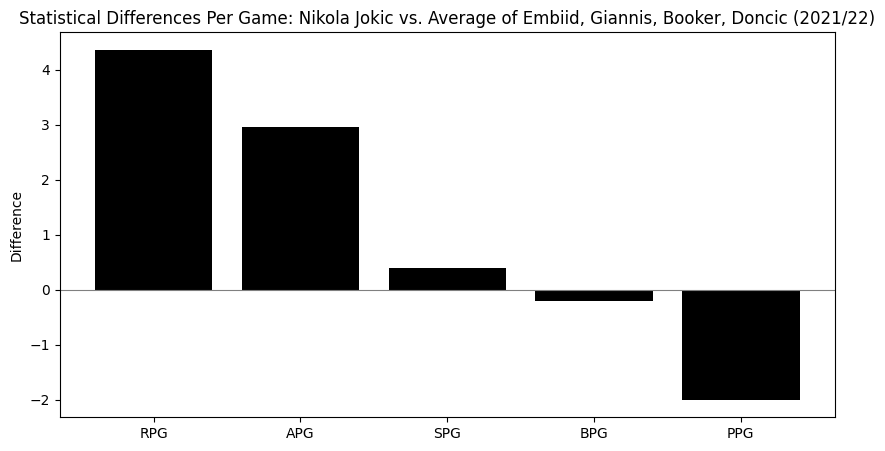

In [ ]:
data_202122 = pd.read_csv('/nba_player_per_game_2122.csv')

# Players to compare
players_to_compare_2122 = ["Joel Embiid", "Giannis Antetokounmpo", "Devin Booker", "Luka Doncic"]

# Ensure data consistency by handling NA/NaN values for player names and stats
data_202122[['players', 'trb', 'ast', 'stl', 'blk', 'pts']].fillna(0, inplace=True)

# Extracting stats for Nikola Jokic, with error handling for no matches
jokic_filter = data_202122["players"].str.contains("Nikola", case=False, na=False)
jokic_stats_2122 = data_202122[jokic_filter].iloc[0]
comparison_players_stats_2122 = data_202122[data_202122["players"].isin(players_to_compare_2122)]

# Calculating the average stats for the comparison players
average_stats_2122 = comparison_players_stats_2122[['trb', 'ast', 'stl', 'blk', 'pts']].mean()

# Calculating the difference between Jokic's stats and the average of the other players
stat_difference_2122 = jokic_stats_2122[['trb', 'ast', 'stl', 'blk', 'pts']] - average_stats_2122

# Create a bar graph to visualize the differences
plt.figure(figsize=(10, 5))
plt.bar(['RPG', 'APG', 'SPG', 'BPG', 'PPG'], stat_difference_2122.values, color=['black'])
plt.title('Statistical Differences Per Game: Nikola Jokic vs. Average of Embiid, Giannis, Booker, Doncic (2021/22)')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linewidth=0.8)  # Adding a line at zero for reference
plt.show()

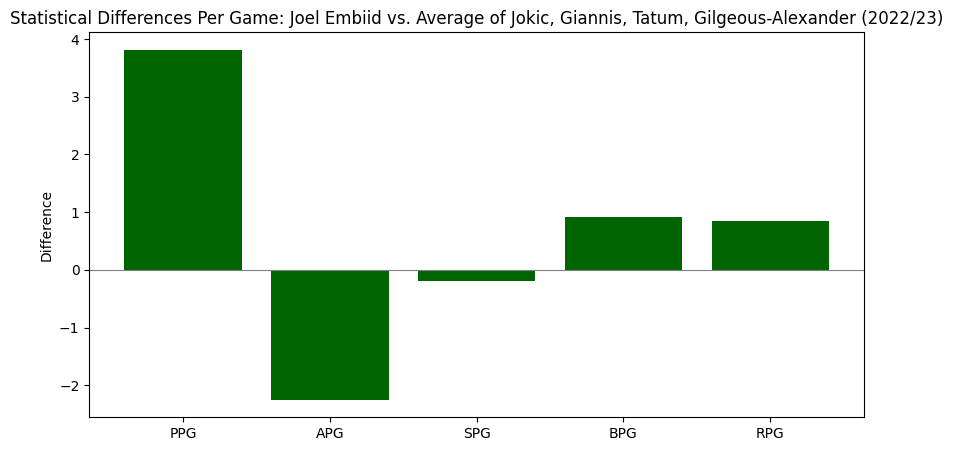

In [ ]:
data_202223 = pd.read_csv('/2022_to_2023_Player_Stats.csv')

# Rename the columns based on the first row (header information)
header = data_202223.iloc[0]
data_2223 = data_202223[1:]
data_202223.columns = header

# Players to compare
players_to_compare_2223 = ["Nikola Jokic", "Giannis Antetokounmpo", "Jayson Tatum", "Shai Gilgeous-Alexander"]

# Extracting stats for Joel Embiid
embiid_stats = data_202223[data_202223["PName"] == "Joel Embiid"]

# Ensure Joel Embiid's data is available
if embiid_stats.empty:
    raise ValueError("Joel Embiid's data is not available in the dataset.")

# Extracting stats for comparison players
comparison_players_stats = data_202223[data_202223["PName"].isin(players_to_compare_2223)]

# Calculating the average stats for the comparison players
average_stats = comparison_players_stats[['PPG', 'APG', 'SPG', 'BPG', 'RPG']].astype(float).mean()

# Calculating the difference between Embiid's stats and the average of the other players
stat_difference = embiid_stats[['PPG', 'APG', 'SPG', 'BPG', 'RPG']].astype(float).iloc[0] - average_stats

# Create a bar graph to visualize the differences
plt.figure(figsize=(10, 5))
plt.bar(['PPG', 'APG', 'SPG', 'BPG', 'RPG'], stat_difference.values, color=['darkgreen'])
plt.title('Statistical Differences Per Game: Joel Embiid vs. Average of Jokic, Giannis, Tatum, Gilgeous-Alexander (2022/23)')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linewidth=0.8)  # Adding a line at zero for reference
plt.show()

**Horizontal Boxplots** comparing (PPG, APG, RPG, BPG, SPG) statistics across different seasons

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
#2019_2020_Player_Stats.csv
#2020_2021_Player_Stats.csv
#2021_2022_Player_Stats.csv
#2022_2023_Player_Stats.csv
#2023_2024_Player_Stats.csv
uploaded = files.upload()

Saving 2019_2020_Player_Stats.csv to 2019_2020_Player_Stats.csv
Saving 2020_2021_Player_Stats.csv to 2020_2021_Player_Stats.csv
Saving 2021_2022_Player_Stats.csv to 2021_2022_Player_Stats.csv
Saving 2022_2023_Player_Stats.csv to 2022_2023_Player_Stats.csv
Saving 2023_2024_Player_Stats.csv to 2023_2024_Player_Stats.csv


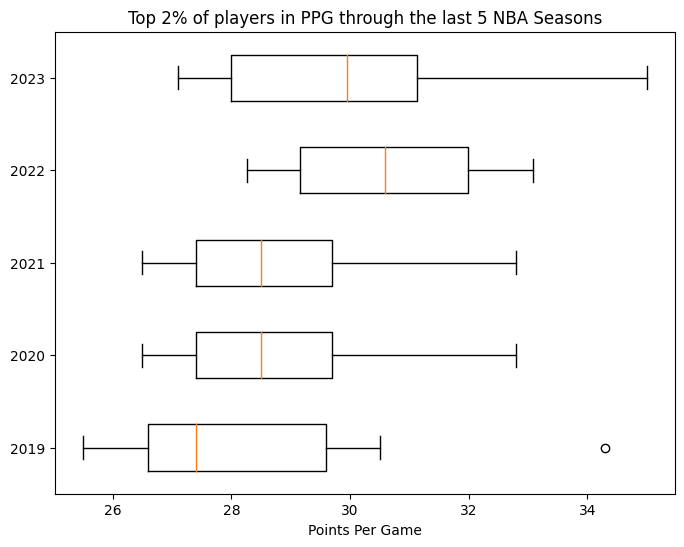

In [ ]:
#Downloads and assigns each season (2019-2023) worth of player data
season2019 = pd.read_csv('2019_2020_Player_Stats.csv')
season2020 = pd.read_csv('2020_2021_Player_Stats.csv')
season2021 = pd.read_csv('2021_2022_Player_Stats.csv')
season2022 = pd.read_csv('2022_2023_Player_Stats.csv')
season2023 = pd.read_csv('2023_2024_Player_Stats.csv')

#Filter the data to find the top 2% of players in the points category in 2019
#Use the top 2% to notice trends in the elite players through the past 5 years
ppg19 = season2019['PPG']
ppg19_sorted = ppg19.sort_values(ascending = False)
top1index_2019 = int(0.02*len(ppg19_sorted))
top1_2019 = ppg19_sorted.iloc[:top1index_2019]

#Filter the data to find the top 2% of players in the points category in 2020
ppg20 = season2020['PPG']
ppg20_sorted = ppg20.sort_values(ascending = False)
top1index_2020 = int(0.02*len(ppg19_sorted))
top1_2020 = ppg20_sorted.iloc[:top1index_2020]

#Filter the data to find the top 2% of players in the points category in 2021
ppg21 = season2021['PPG']
ppg21_sorted = ppg21.sort_values(ascending = False)
top1index_2021 = int(0.02*len(ppg19_sorted))
top1_2021 = ppg21_sorted.iloc[:top1index_2021]

#Filter the data to find the top 2% of players in the points category in 2022
ppg22 = season2022['PPG']
ppg22_sorted = ppg22.sort_values(ascending = False)
top1index_2022 = int(0.02*len(ppg22_sorted))
top1_2022 = ppg22_sorted.iloc[:top1index_2022]

#Filter the data to find the top 2% of players in the points category in 2023
ppg23 = season2023['PPG']
ppg23_sorted = ppg23.sort_values(ascending = False)
top1index_2023 = int(0.02*len(ppg23_sorted))
top1_2023 = ppg23_sorted.iloc[:top1index_2023]

#Create the boxplots
years = ['2019', '2020', '2021', '2022', '2023']
plt.figure(figsize=(8, 6))
plt.boxplot([top1_2019,top1_2020,top1_2021,top1_2022,top1_2023], vert=False)
plt.xlabel('Points Per Game')
plt.yticks(np.arange(1, len(years)+1),years)
plt.title('Top 2% of players in PPG through the last 5 NBA Seasons')
plt.show()

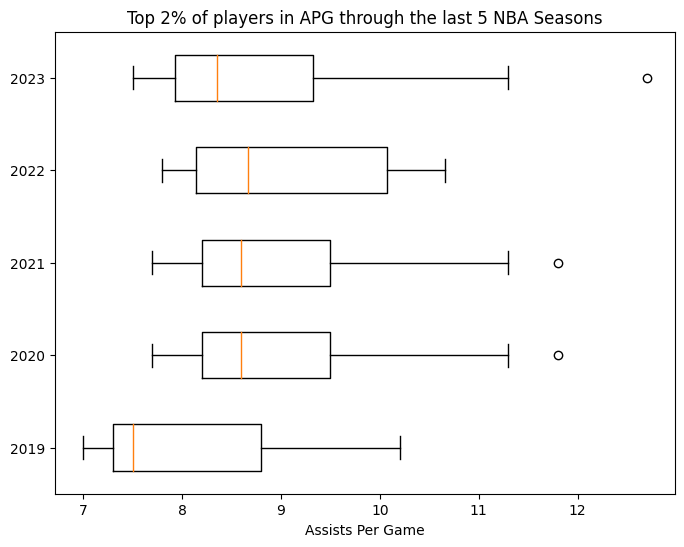

In [ ]:
#Filter the data to find the top 2% of players in the assists category in 2019
apg19 = season2019['APG']
apg19_sorted = apg19.sort_values(ascending = False)
top1index_2019 = int(0.02*len(apg19_sorted))
top1_2019 = apg19_sorted.iloc[:top1index_2019]

#Filter the data to find the top 2% of players in the assists category in 2020
apg20 = season2020['APG']
apg20_sorted = apg20.sort_values(ascending = False)
top1index_2020 = int(0.02*len(apg19_sorted))
top1_2020 = apg20_sorted.iloc[:top1index_2020]

#Filter the data to find the top 2% of players in the assists category in 2021
apg21 = season2021['APG']
apg21_sorted = apg21.sort_values(ascending = False)
top1index_2021 = int(0.02*len(apg19_sorted))
top1_2021 = apg21_sorted.iloc[:top1index_2021]

#Filter the data to find the top 2% of players in the assists category in 2022
apg22 = season2022['APG']
apg22_sorted = apg22.sort_values(ascending = False)
top1index_2022 = int(0.02*len(apg22_sorted))
top1_2022 = apg22_sorted.iloc[:top1index_2022]

#Filter the data to find the top 2% of players in the assists category in 2023
apg23 = season2023['APG']
apg23_sorted = apg23.sort_values(ascending = False)
top1index_2023 = int(0.02*len(apg23_sorted))
top1_2023 = apg23_sorted.iloc[:top1index_2023]

#Create the boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([top1_2019, top1_2020, top1_2021, top1_2022, top1_2023], vert=False)
plt.xlabel('Assists Per Game')
plt.yticks(np.arange(1, len(years)+1),years)
plt.title('Top 2% of players in APG through the last 5 NBA Seasons')
plt.show()



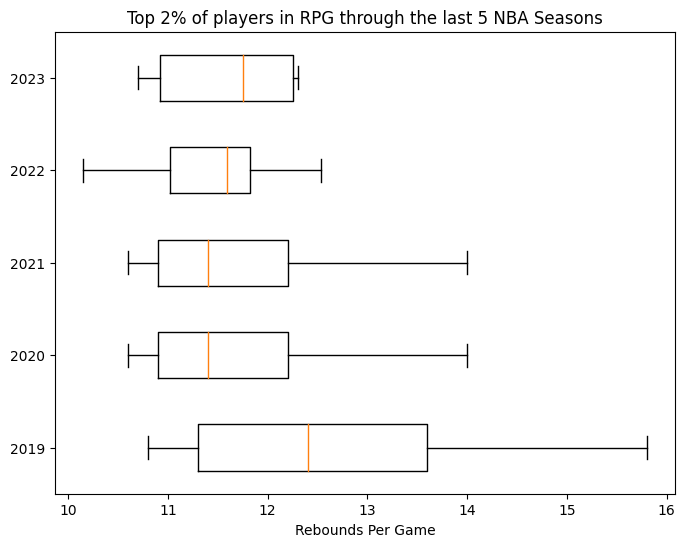

In [ ]:
#Filter the data to find the top 2% of players in the rebounds category in 2019
rpg19 = season2019['RPG']
rpg19_sorted = rpg19.sort_values(ascending = False)
top1index_2019 = int(0.02*len(rpg19_sorted))
top1_2019 = rpg19_sorted.iloc[:top1index_2019]

#Filter the data to find the top 2% of players in the rebounds category in 2020
rpg20 = season2020['RPG']
rpg20_sorted = rpg20.sort_values(ascending = False)
top1index_2020 = int(0.02*len(rpg19_sorted))
top1_2020 = rpg20_sorted.iloc[:top1index_2020]

#Filter the data to find the top 2% of players in the rebounds category in 2021
rpg21 = season2021['RPG']
rpg21_sorted = rpg21.sort_values(ascending = False)
top1index_2021 = int(0.02*len(rpg19_sorted))
top1_2021 = rpg21_sorted.iloc[:top1index_2021]

#Filter the data to find the top 2% of players in the rebounds category in 2022
rpg22 = season2022['RPG']
rpg22_sorted = rpg22.sort_values(ascending = False)
top1index_2022 = int(0.02*len(rpg22_sorted))
top1_2022 = rpg22_sorted.iloc[:top1index_2022]

#Filter the data to find the top 2% of players in the rebounds category in 2023
rpg23 = season2023['RPG']
rpg23_sorted = rpg23.sort_values(ascending = False)
top1index_2023 = int(0.02*len(rpg23_sorted))
top1_2023 = rpg23_sorted.iloc[:top1index_2023]

#Create the boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([top1_2019, top1_2020, top1_2021, top1_2022, top1_2023], vert=False)
plt.xlabel('Rebounds Per Game')
plt.yticks(np.arange(1, len(years)+1),years)
plt.title('Top 2% of players in RPG through the last 5 NBA Seasons')
plt.show()


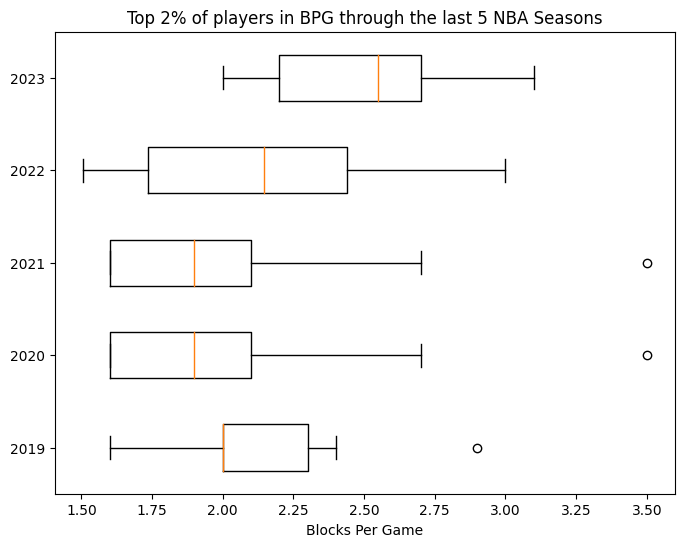

In [ ]:
#Filter the data to find the top 2% of players in the blocks category in 2019
bpg19 = season2019['BPG']
bpg19_sorted = bpg19.sort_values(ascending = False)
top1index_2019 = int(0.02*len(bpg19_sorted))
top1_2019 = bpg19_sorted.iloc[:top1index_2019]

#Filter the data to find the top 2% of players in the blocks category in 2020
bpg20 = season2020['BPG']
bpg20_sorted = bpg20.sort_values(ascending = False)
top1index_2020 = int(0.02*len(bpg19_sorted))
top1_2020 = bpg20_sorted.iloc[:top1index_2020]

#Filter the data to find the top 2% of players in the blocks category in 2021
bpg21 = season2021['BPG']
bpg21_sorted = bpg21.sort_values(ascending = False)
top1index_2021 = int(0.02*len(bpg19_sorted))
top1_2021 = bpg21_sorted.iloc[:top1index_2021]

#Filter the data to find the top 2% of players in the blocks category in 2022
bpg22 = season2022['BPG']
bpg22_sorted = bpg22.sort_values(ascending = False)
top1index_2022 = int(0.02*len(bpg22_sorted))
top1_2022 = bpg22_sorted.iloc[:top1index_2022]

#Filter the data to find the top 2% of players in the blocks category in 2023
bpg23 = season2023['BPG']
bpg23_sorted = bpg23.sort_values(ascending = False)
top1index_2023 = int(0.02*len(bpg23_sorted))
top1_2023 = bpg23_sorted.iloc[:top1index_2023]

#Create the boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([top1_2019, top1_2020, top1_2021, top1_2022, top1_2023], vert=False)
plt.xlabel('Blocks Per Game')
plt.yticks(np.arange(1, len(years)+1),years)
plt.title('Top 2% of players in BPG through the last 5 NBA Seasons')
plt.show()

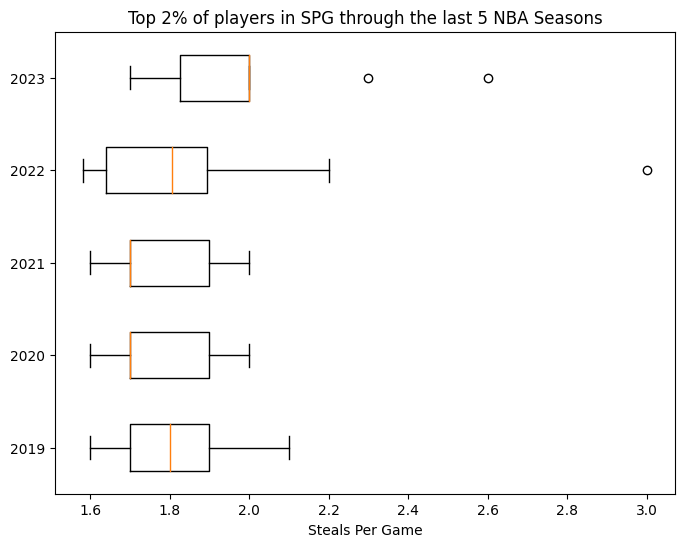

In [ ]:
#Filter the data to find the top 2% of players in the steals category in 2019
spg19 = season2019['SPG']
spg19_sorted = spg19.sort_values(ascending = False)
top1index_2019 = int(0.02*len(spg19_sorted))
top1_2019 = spg19_sorted.iloc[:top1index_2019]

#Filter the data to find the top 2% of players in the steals category in 2020
spg20 = season2020['SPG']
spg20_sorted = spg20.sort_values(ascending = False)
top1index_2020 = int(0.02*len(spg19_sorted))
top1_2020 = spg20_sorted.iloc[:top1index_2020]

#Filter the data to find the top 2% of players in the steals category in 2021
spg21 = season2021['SPG']
spg21_sorted = spg21.sort_values(ascending = False)
top1index_2021 = int(0.02*len(spg19_sorted))
top1_2021 = spg21_sorted.iloc[:top1index_2021]

#Filter the data to find the top 2% of players in the steals category in 2022
spg22 = season2022['SPG']
spg22_sorted = spg22.sort_values(ascending = False)
top1index_2022 = int(0.02*len(spg22_sorted))
top1_2022 = spg22_sorted.iloc[:top1index_2022]

#Filter the data to find the top 2% of players in the steals category in 2023
spg23 = season2023['SPG']
spg23_sorted = spg23.sort_values(ascending = False)
top1index_2023 = int(0.02*len(spg23_sorted))
top1_2023 = spg23_sorted.iloc[:top1index_2023]

#Create the boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([top1_2019, top1_2020, top1_2021, top1_2022, top1_2023], vert=False)
plt.xlabel('Steals Per Game')
plt.yticks(np.arange(1, len(years)+1),years)
plt.title('Top 2% of players in SPG through the last 5 NBA Seasons')
plt.show()

**MVP Scatterplots**

In [ ]:
from google.colab import files
#Total_MVP_Voting_Results.csv
uploaded = files.upload()

Saving Total_MVP_Voting_Results.csv to Total_MVP_Voting_Results.csv


In [ ]:
total_stats = pd.read_csv('Total_Player_Stats.csv')
MVP_voting = pd.read_csv('Total_MVP_Voting_Results.csv')

#Gets rid of the last NaN (empty) row
filtered_stats = total_stats.iloc[:-1]

#Filters for the 2019 season
data19 = filtered_stats[filtered_stats['Player'].str.contains('19 20')]
data19

#Merges the total stats csv and mvp voting csv
stats_merged19 = data19.set_index('Player').join(MVP_voting.set_index('Player'))
stats_merged19.sort_values(by = 'Total Points', ascending = False)
stats_merged19['Total Points'] = stats_merged19['Total Points'].fillna(0)
stats_merged19.loc[stats_merged19['Rank'].notnull(), 'Rank'] = True
stats_merged19['Rank'] = stats_merged19['Rank'].fillna(False)

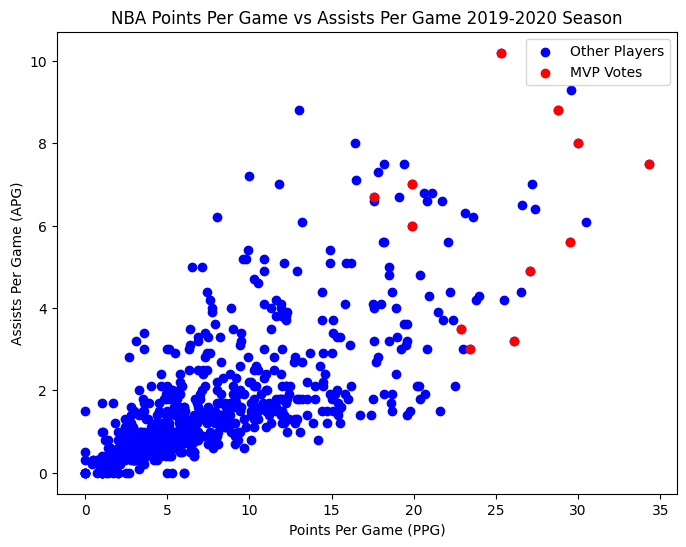

In [ ]:
#Plots a scatterplot comparing PPG and APG in 2019 to those who recieved MVP votes
plt.figure(figsize=(8, 6))
plt.scatter(stats_merged19['PPG'], stats_merged19['APG'], color='blue', label='Other Players')

#Seperate the players who recieved an MVP vote
mvp_players = stats_merged19[stats_merged19['Rank'] == True]
plt.scatter(mvp_players['PPG'], mvp_players['APG'], color='red', label='MVP Votes')

plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Assists Per Game (APG)')
plt.title('NBA Points Per Game vs Assists Per Game 2019-2020 Season')
plt.legend()
plt.show()

In [ ]:
#Filters for the 2020 season
data20 = filtered_stats[filtered_stats['Player'].str.contains('20 21')]
data20

#Merges the total stats csv and mvp voting csv
stats_merged20 = data20.set_index('Player').join(MVP_voting.set_index('Player'))
stats_merged20.sort_values(by = 'Total Points', ascending = False)
stats_merged20['Total Points'] = stats_merged20['Total Points'].fillna(0)
stats_merged20.loc[stats_merged20['Rank'].notnull(), 'Rank'] = True
stats_merged20['Rank'] = stats_merged20['Rank'].fillna(False)

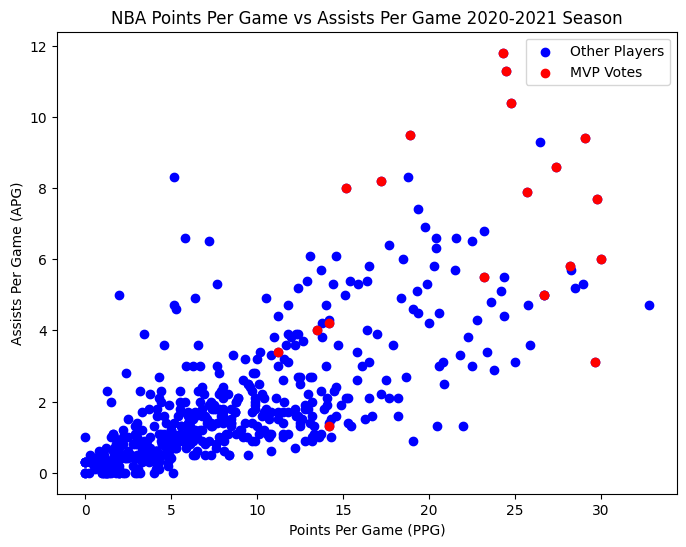

In [ ]:
#Plots a scatterplot comparing PPG and APG in 2020 to those who recieved MVP votes
plt.figure(figsize=(8, 6))
plt.scatter(stats_merged20['PPG'], stats_merged20['APG'], color='blue', label='Other Players')

#Seperate the players who recieved an MVP vote
mvp_players = stats_merged20[stats_merged20['Rank'] == True]
plt.scatter(mvp_players['PPG'], mvp_players['APG'], color='red', label='MVP Votes')

plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Assists Per Game (APG)')
plt.title('NBA Points Per Game vs Assists Per Game 2020-2021 Season')
plt.legend()
plt.show()

In [ ]:
#Filters for the 2021 season
data21 = filtered_stats[filtered_stats['Player'].str.contains('21 22')]
data21

#Merges the total stats csv and mvp voting csv
stats_merged21 = data21.set_index('Player').join(MVP_voting.set_index('Player'))
stats_merged21.sort_values(by = 'Total Points', ascending = False)
stats_merged21['Total Points'] = stats_merged21['Total Points'].fillna(0)
stats_merged21.loc[stats_merged21['Rank'].notnull(), 'Rank'] = True
stats_merged21['Rank'] = stats_merged21['Rank'].fillna(False)

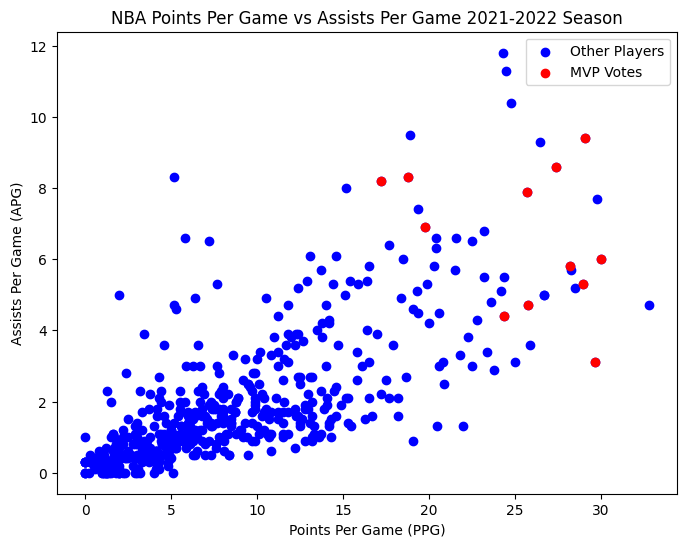

In [ ]:
#Plots a scatterplot comparing PPG and APG in 2021 to those who recieved MVP votes
plt.figure(figsize=(8, 6))
plt.scatter(stats_merged21['PPG'], stats_merged21['APG'], color='blue', label='Other Players')

#Seperate the players who recieved an MVP vote
mvp_players = stats_merged21[stats_merged21['Rank'] == True]
plt.scatter(mvp_players['PPG'], mvp_players['APG'], color='red', label='MVP Votes')

plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Assists Per Game (APG)')
plt.title('NBA Points Per Game vs Assists Per Game 2021-2022 Season')
plt.legend()
plt.show()

In [ ]:
#Filters for the 2022 season
data22 = filtered_stats[filtered_stats['Player'].str.contains('22 23')]
data22

#Merges the total stats csv and mvp voting csv
stats_merged22 = data22.set_index('Player').join(MVP_voting.set_index('Player'))
stats_merged22.sort_values(by = 'Total Points', ascending = False)
stats_merged22['Total Points'] = stats_merged22['Total Points'].fillna(0)
stats_merged22.loc[stats_merged22['Rank'].notnull(), 'Rank'] = True
stats_merged22['Rank'] = stats_merged22['Rank'].fillna(False)

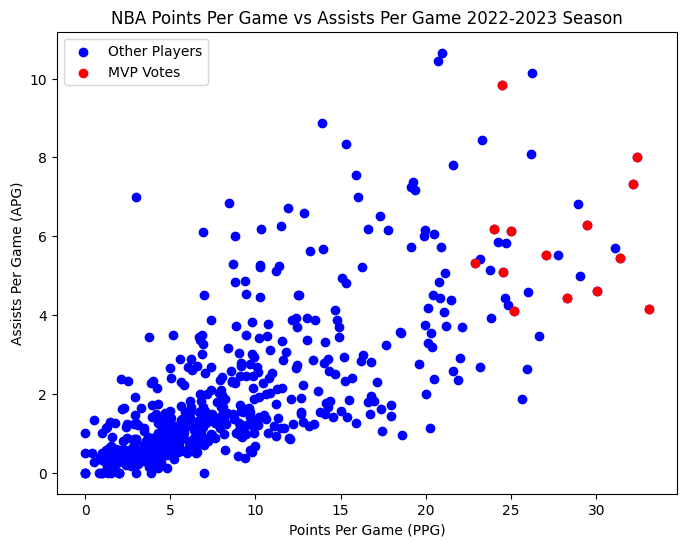

In [ ]:
#Plots a scatterplot comparing PPG and APG in 2022 to those who recieved MVP votes
plt.figure(figsize=(8, 6))
plt.scatter(stats_merged22['PPG'], stats_merged22['APG'], color='blue', label='Other Players')

#Seperate the players who recieved an MVP vote
mvp_players = stats_merged22[stats_merged22['Rank'] == True]
plt.scatter(mvp_players['PPG'], mvp_players['APG'], color='red', label='MVP Votes')

plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Assists Per Game (APG)')
plt.title('NBA Points Per Game vs Assists Per Game 2022-2023 Season')
plt.legend()
plt.show()

In [ ]:
#Filters for the 2023 season
data23 = filtered_stats[filtered_stats['Player'].str.contains('23 24')]
data23

#Merges the total stats csv and mvp voting csv
stats_merged23 = data23.set_index('Player').join(MVP_voting.set_index('Player'))
stats_merged23.sort_values(by = 'Total Points', ascending = False)
stats_merged23['Total Points'] = stats_merged23['Total Points'].fillna(0)
stats_merged23.loc[stats_merged23['Rank'].notnull(), 'Rank'] = True
stats_merged23['Rank'] = stats_merged23['Rank'].fillna(False)

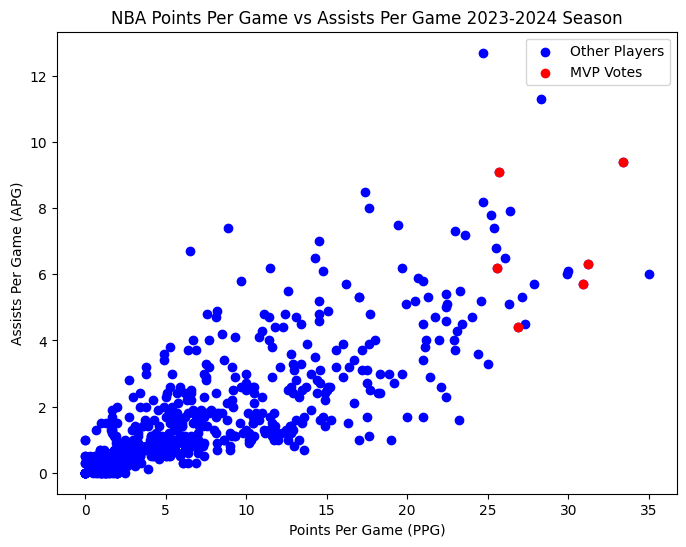

In [ ]:
#Plots a scatterplot comparing PPG and APG in 2023 to those who recieved MVP votes
plt.figure(figsize=(8, 6))
plt.scatter(stats_merged23['PPG'], stats_merged23['APG'], color='blue', label='Other Players')

#Seperate the players who recieved an MVP vote
mvp_players = stats_merged23[stats_merged23['Rank'] == True]
plt.scatter(mvp_players['PPG'], mvp_players['APG'], color='red', label='MVP Votes')

plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Assists Per Game (APG)')
plt.title('NBA Points Per Game vs Assists Per Game 2023-2024 Season')
plt.legend()
plt.show()

**Comparing MVP to Runner-Up**

In [ ]:
from google.colab import files
#2019_2020_Player_Stats.csv
#2020_2021_Player_Stats.csv
#2021_2022_Player_Stats.csv
#2022_2023_Player_Stats.csv
#2023_2024_Player_Stats.csv
uploaded = files.upload()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

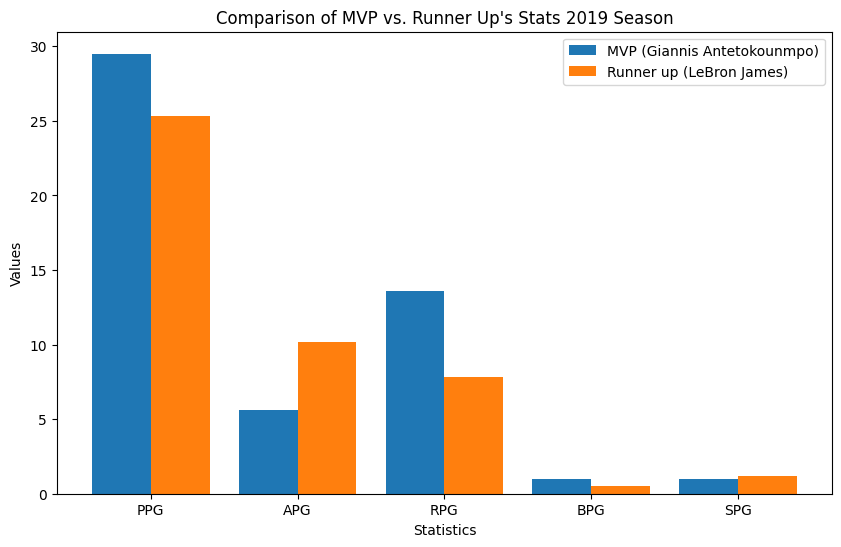

In [ ]:
#2019 Season
#Retrieves the player stats for both the mvp and runner up
mvp19 = filtered_stats[filtered_stats['Player'].str.contains('Giannis Antetokounmpo 19 20')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
runnerup19 = filtered_stats[filtered_stats['Player'].str.contains('LeBron James 19 20')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
stats = ['PPG', 'APG', 'RPG', 'BPG', 'SPG']

#Cleans data to fit the bar chart
mvp19stats = mvp19.iloc[:, :].values.flatten()
runnerup19stats = runnerup19.iloc[:, :].values.flatten()
positions = range(len(stats))

#Plots the bar chart comparing the two players
plt.figure(figsize=(10, 6))
plt.bar(positions, mvp19stats, width=0.4, label='MVP (Giannis Antetokounmpo)')
plt.bar([pos + 0.4 for pos in positions], runnerup19stats, width=0.4, label='Runner up (LeBron James)')

#Labels and sizing
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of MVP vs. Runner Up\'s Stats 2019 Season')
plt.xticks([pos + 0.2 for pos in positions], stats)
plt.legend()

plt.show()


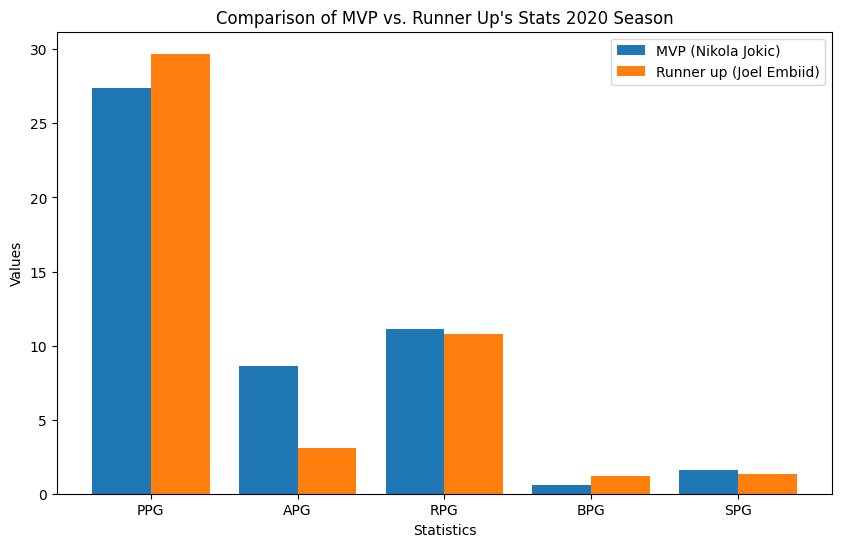

In [ ]:
#2020 Season
#Retrieves the player stats for both the mvp and runner up
mvp20 = filtered_stats[filtered_stats['Player'].str.contains('Nikola Jokic 20 21')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
runnerup20 = filtered_stats[filtered_stats['Player'].str.contains('Joel Embiid 20 21')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
stats = ['PPG', 'APG', 'RPG', 'BPG', 'SPG']

#Cleans data to fit the bar chart
mvp20stats = mvp20.iloc[:, :].values.flatten()
runnerup20stats = runnerup20.iloc[:, :].values.flatten()
positions = range(len(stats))

#Plots the bar chart comparing the two players
plt.figure(figsize=(10, 6))
plt.bar(positions, mvp20stats, width=0.4, label='MVP (Nikola Jokic)')
plt.bar([pos + 0.4 for pos in positions], runnerup20stats, width=0.4, label='Runner up (Joel Embiid)')

#Labels and sizing
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of MVP vs. Runner Up\'s Stats 2020 Season')
plt.xticks([pos + 0.2 for pos in positions], stats)
plt.legend()

plt.show()

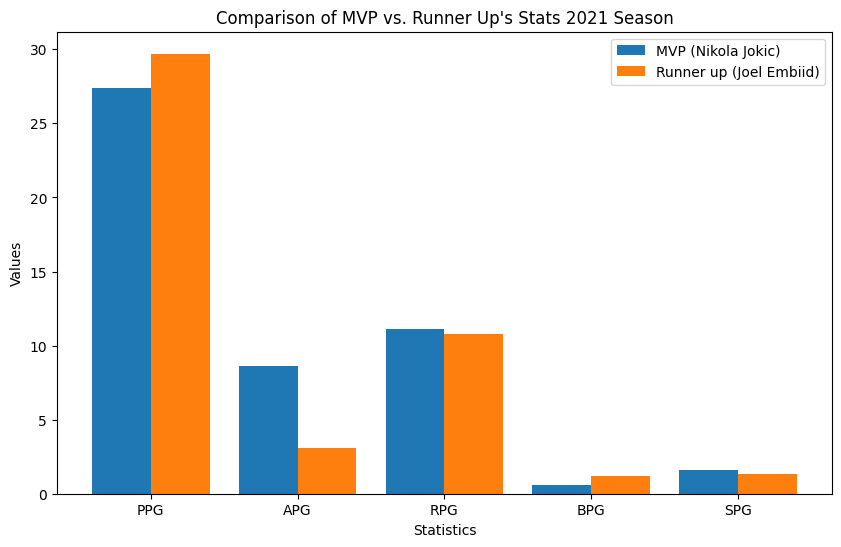

In [ ]:
#2021 Season
#Retrieves the player stats for both the mvp and runner up
mvp21 = filtered_stats[filtered_stats['Player'].str.contains('Nikola Jokic 21 22')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
runnerup21 = filtered_stats[filtered_stats['Player'].str.contains('Joel Embiid 21 22')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
stats = ['PPG', 'APG', 'RPG', 'BPG', 'SPG']

#Cleans data to fit the bar chart
mvp21stats = mvp21.iloc[:, :].values.flatten()
runnerup21stats = runnerup21.iloc[:, :].values.flatten()
positions = range(len(stats))

#Plots the bar chart comparing the two players
plt.figure(figsize=(10, 6))
plt.bar(positions, mvp21stats, width=0.4, label='MVP (Nikola Jokic)')
plt.bar([pos + 0.4 for pos in positions], runnerup21stats, width=0.4, label='Runner up (Joel Embiid)')

#Labels and sizing
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of MVP vs. Runner Up\'s Stats 2021 Season')
plt.xticks([pos + 0.2 for pos in positions], stats)
plt.legend()

plt.show()


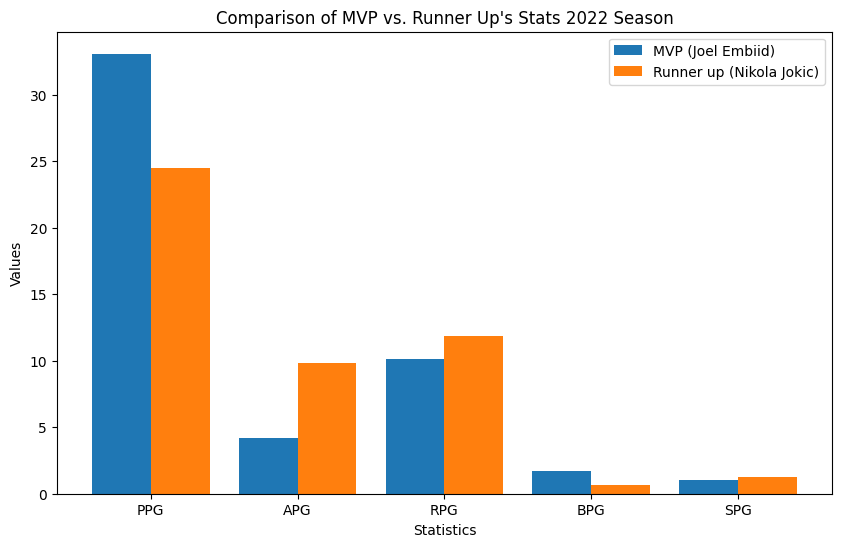

In [ ]:
#2022 Season
#Retrieves the player stats for both the mvp and runner up
mvp22 = filtered_stats[filtered_stats['Player'].str.contains('Joel Embiid 22 23')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
runnerup22 = filtered_stats[filtered_stats['Player'].str.contains('Nikola Jokic 22 23')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
stats = ['PPG', 'APG', 'RPG', 'BPG', 'SPG']

#Cleans data to fit the bar chart
mvp22stats = mvp22.iloc[:, :].values.flatten()
runnerup22stats = runnerup22.iloc[:, :].values.flatten()
positions = range(len(stats))

#Plots the bar chart comparing the two players
plt.figure(figsize=(10, 6))
plt.bar(positions, mvp22stats, width=0.4, label='MVP (Joel Embiid)')
plt.bar([pos + 0.4 for pos in positions], runnerup22stats, width=0.4, label='Runner up (Nikola Jokic)')

#Labels and sizing
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of MVP vs. Runner Up\'s Stats 2022 Season')
plt.xticks([pos + 0.2 for pos in positions], stats)
plt.legend()

plt.show()

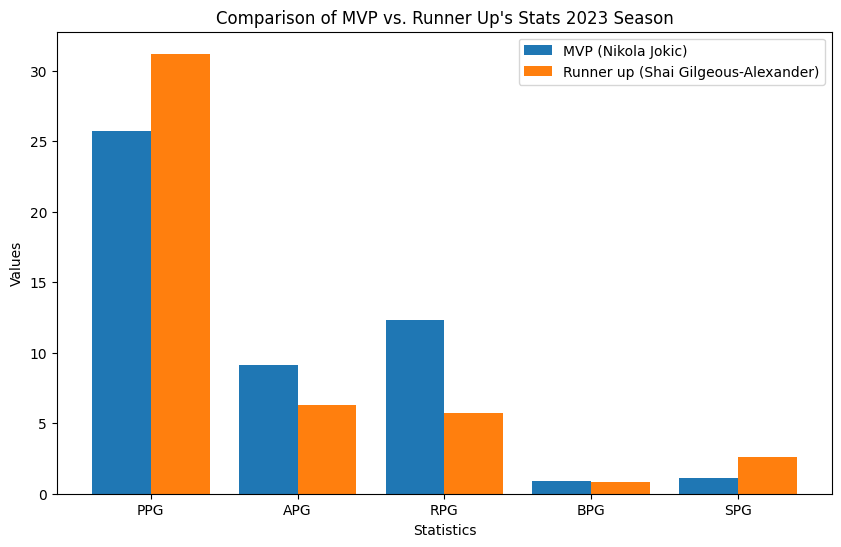

In [ ]:
#2023 Season
#The MVP for this year's season has yet to be announced so we will take the two front runners to compare
#Retrieves the player stats for both the presicted mvp and runner up
mvp23 = filtered_stats[filtered_stats['Player'].str.contains('Nikola Jokic 23 24')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
runnerup23 = filtered_stats[filtered_stats['Player'].str.contains('Shai Gilgeous-Alexander 23 24')][['PPG', 'APG', 'RPG', 'BPG', 'SPG']]
stats = ['PPG', 'APG', 'RPG', 'BPG', 'SPG']

#Cleans data to fit the bar chart
mvp23stats = mvp23.iloc[:, :].values.flatten()
runnerup23stats = runnerup23.iloc[:, :].values.flatten()
positions = range(len(stats))

#Plots the bar chart comparing the two players
plt.figure(figsize=(10, 6))
plt.bar(positions, mvp23stats, width=0.4, label='MVP (Nikola Jokic)')
plt.bar([pos + 0.4 for pos in positions], runnerup23stats, width=0.4, label='Runner up (Shai Gilgeous-Alexander)')

#Labels and sizingf
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of MVP vs. Runner Up\'s Stats 2023 Season')
plt.xticks([pos + 0.2 for pos in positions], stats)
plt.legend()

plt.show()